In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_phasespacerestriction/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_momentum_wighted.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.00616325213863
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	989714
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut

num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
#eff , pur = NuCC_w.printEff_w(cut)

In [14]:
cut = 'fidVol && muon'
#eff , pur = NuCC_w.printEff_w(cut)

In [15]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_muon_cut_V'
side_right = 'right'
side_left = 'left'
start = time.time()
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
end = time.time()
print(end - start)

5.31673431396e-05


In [16]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries('numu_true')*scale_out[overlay_out]

print N_overlay

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
globale.dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

overlay_out.Draw(weight_name+'>>h_weight_func',numu_true,'0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()

print overlay_pass_weight

N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight
eff = N_signal/N_true

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Efficiency: ',eff
print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

179.535534798
1.11552437507
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 200.276265258
Number of overlay signal: 974.507772305
Efficiency:  0.555862606733
Total integrated cross section: 7.5662232335e-39
Total integrated cross section for MC: 7.57471816166e-39


In [17]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [18]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [19]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


782

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_eff_trueMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_eff_trueMom.pdf has been created


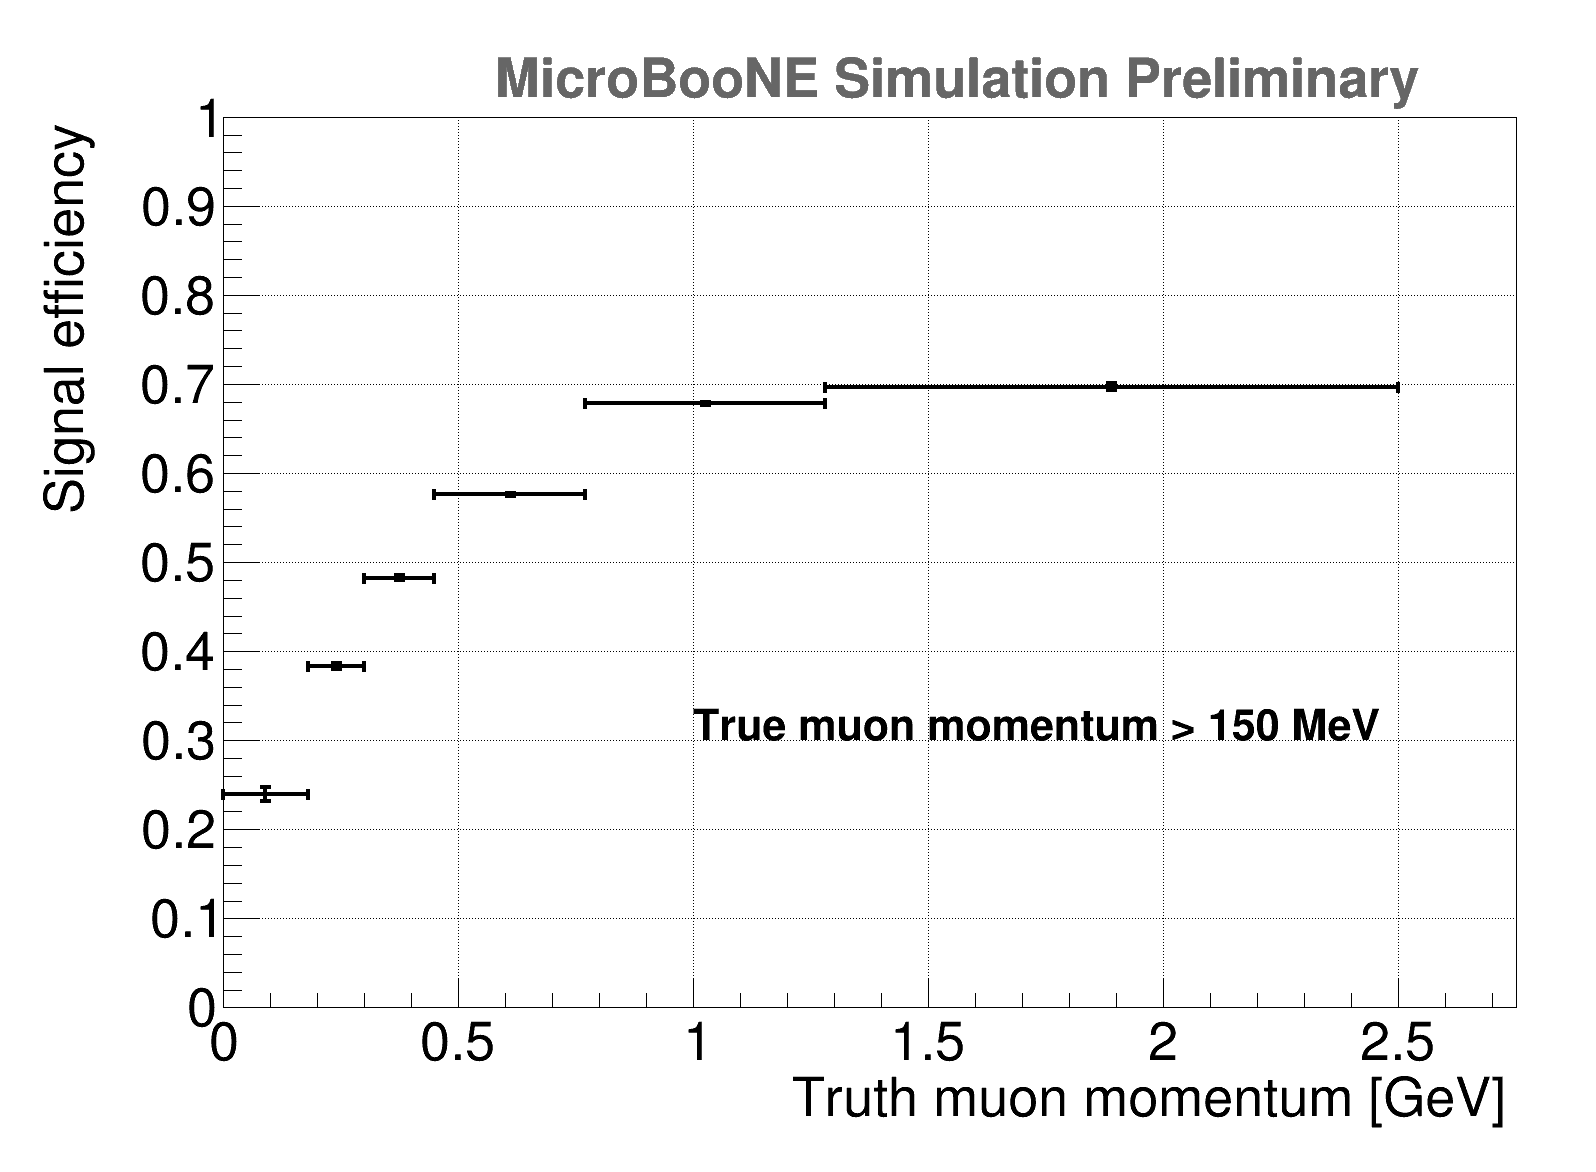

In [20]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
t = ROOT.TLatex(1,0.3,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueMom.pdf")

eff.Write("h_eff_true")

In [21]:
N_sig = h_init_eff_energy.Integral(0,binnum+1)
N_true = h_init_eff_energy_1.Integral(0,binnum+1)
print N_sig/N_true,N_sig,N_true

0.555857769443 158116.751831 284455.413818


185666

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h2_true_MCS.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h2_true_MCS.pdf has been created


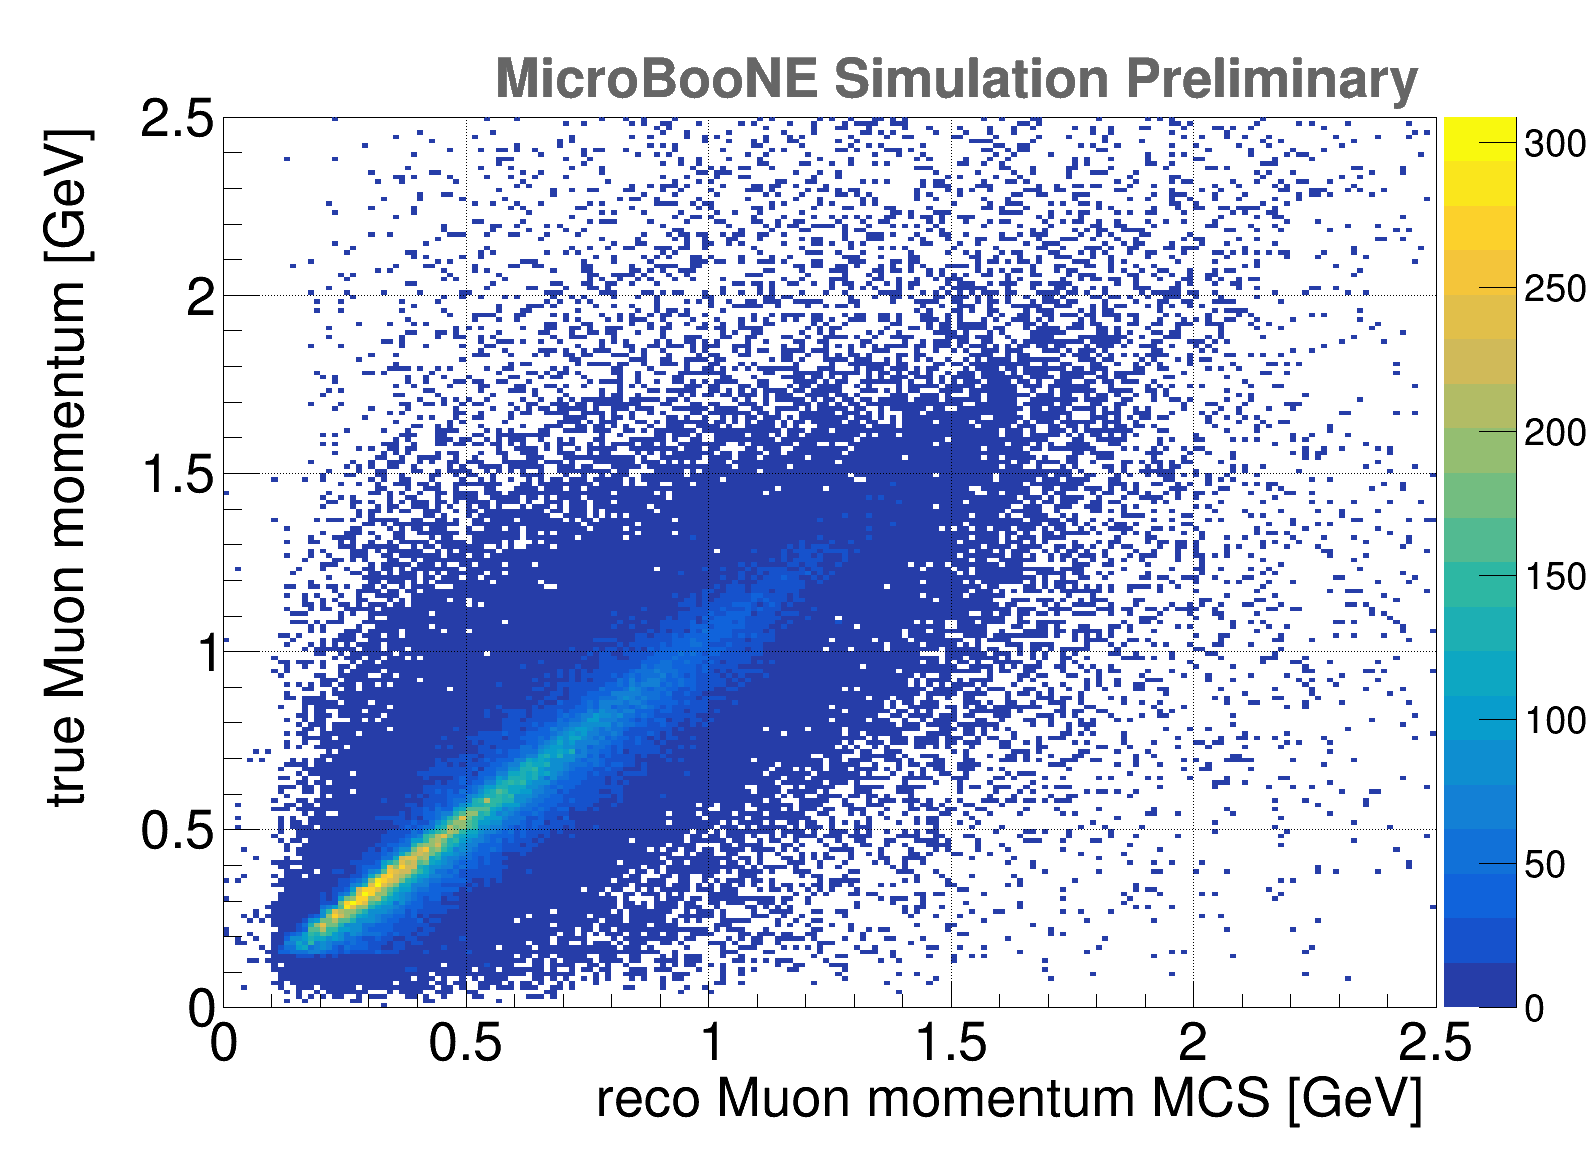

In [22]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS.pdf")
h_migration.Write("h2_true_MCS_fine")

1272

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h2_true_MCS_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h2_true_MCS_bin.pdf has been created


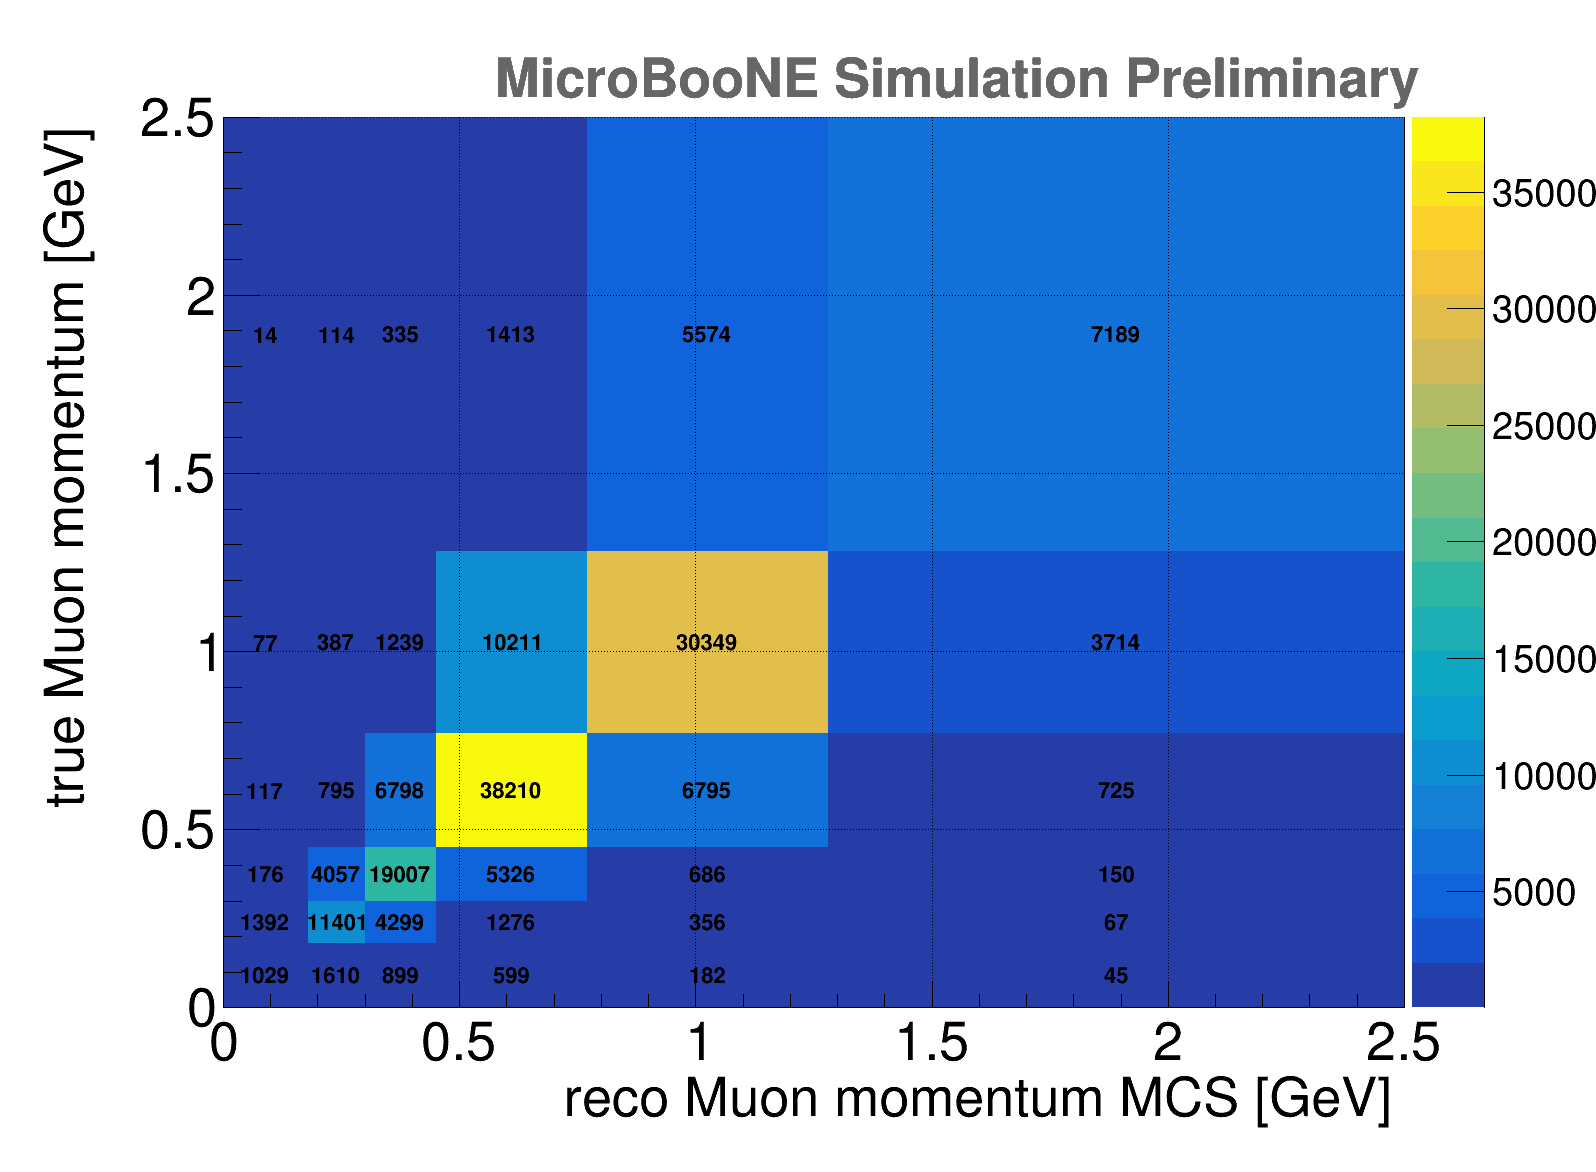

In [23]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins)) #fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&  MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.0f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

6


689

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_mitigation_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_mitigation_matrix.pdf has been created


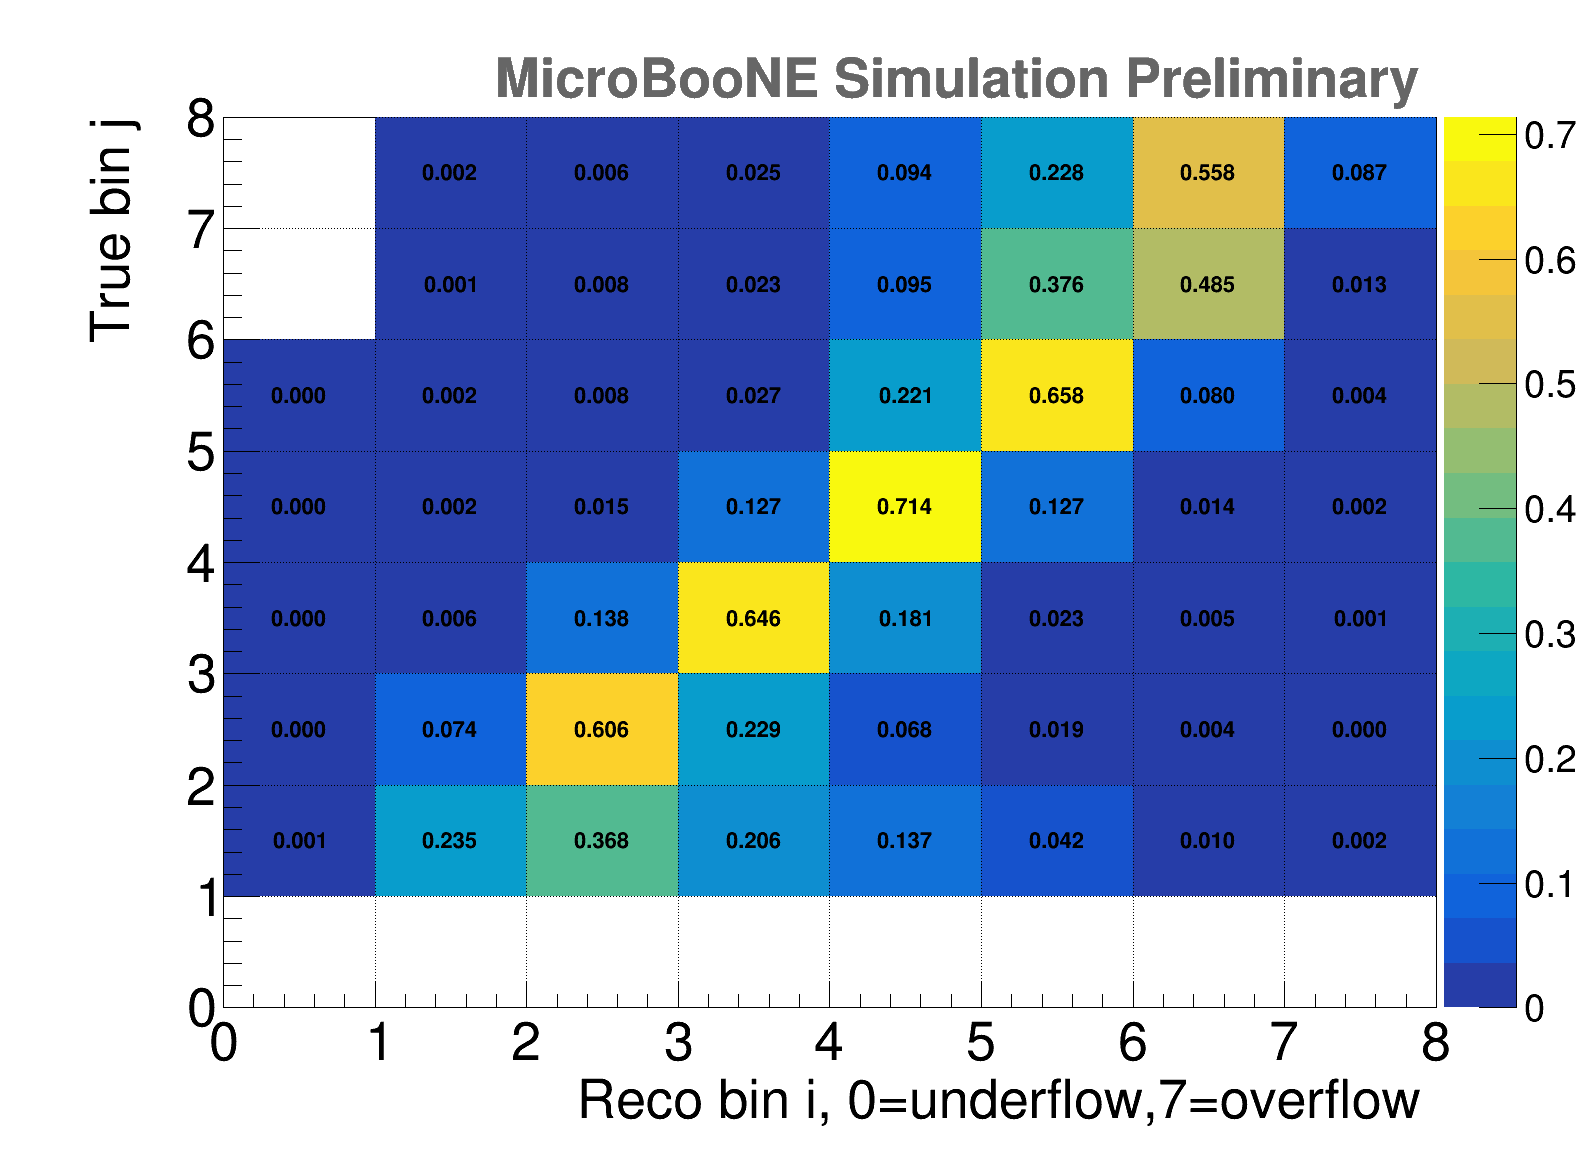

In [24]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0]
mitigation_matrix = np.zeros((8,8))
print binnum
for j in range(0,binnum+2):
    for i in range(0,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',8,0,8,8,0,8)
for j in range(0,binnum+2):
    for i in range(0,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i,j]= h_migration.GetBinContent(i,j)/(reco_entries[j]+1e-80)
        h_mitigation_matrix.SetBinContent(i+1,j+1,mitigation_matrix[i,j])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
#print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 0=underflow,7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [25]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

486

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [26]:
# e tilde
N_sel = np.zeros((8))
N_gen = np.zeros((8))
for i in range(0,binnum+2):
    N_sel[i] = h_init_eff_energy.GetBinContent(i)
    N_gen[i] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i],N_gen[i],N_sel[i]/N_gen[i]
eff_tilde = np.zeros((8))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)
print output_filedir

0.0 0.0 nan
1786.0643310546875 7443.4169921875 0.23995220648383855
15284.4296875 39873.6328125 0.3833217243929798
27156.919921875 56265.5625 0.4826561526311054
51645.1171875 89653.0390625 0.5760553989864922
45269.43359375 66761.640625 0.6780755111760707
14492.2001953125 20789.4296875 0.6970946492113819
2482.5869140625 3668.692138671875 0.6766953508836083
[0.47367658 0.35735808 0.40662528 0.48685435 0.57569865 0.65351805
 0.67457825 0.64924076]
/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/


/home/tmettler/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [27]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

461

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_eff_tilde_xsecMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_eff_tilde_xsecMom.pdf has been created


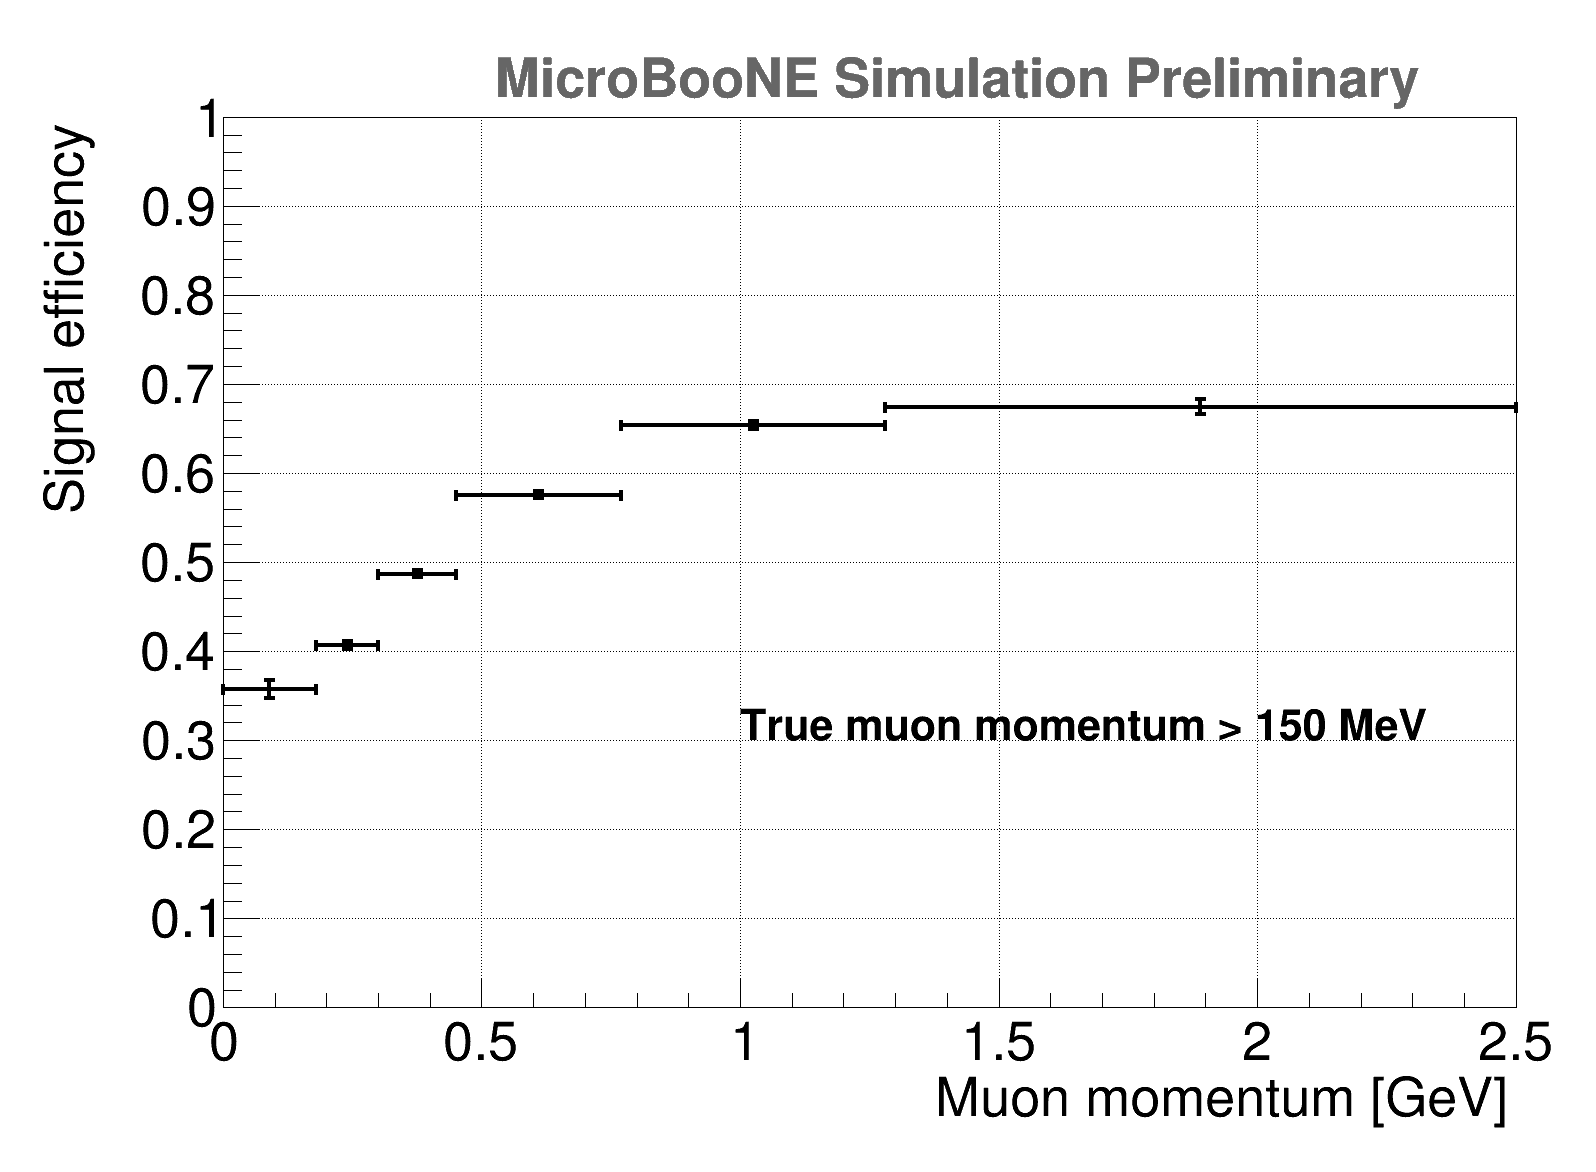

In [28]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
t = ROOT.TLatex(1,0.3,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecMom.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [29]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
globale.ext_out.Draw(variable+'>>h_ext',cut,'')
globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true)','')

237795L

In [30]:
from uncertainties import ufloat
from uncertainties.umath import *  

In [31]:
#lat = np.zeros(8,binnum)
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    n_da = h_data.GetBinContent(i)
    err_da = math.sqrt(n_da)
    n_ext = h_ext.GetBinContent(i)
    err_ext = math.sqrt(n_ext)
    n_dirt = h_dirt.GetBinContent(i)
    err_dirt = math.sqrt(n_dirt)
    n_ov = h_overlay.GetBinContent(i)
    err_ov = math.sqrt(n_ov)
    n_sig = h_signal.GetBinContent(i)
    err_sig = math.sqrt(n_sig)
    #print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
    #' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
    #print ''
    print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ext*scale[ext]),' $\pm$ {0:0.2f}'.format(err_ext*scale[ext]),\
        ' & {0:0.2f}'.format(n_dirt*scale[dirt]),' $\pm$ {0:0.2f}'.format(err_dirt*scale[dirt]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' $\pm$ {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        ' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    
    
    
    #print 'data: {0:0.2f}'.format(n_da*scale[data]), ' +- {0:0.2f}'.format(err_da*scale[data])
    #print ' Ext: {0:0.2f}'.format(n_ext*scale[ext]),' +- {0:0.2f}'.format(err_ext*scale[ext])
    #print' Dirt: {0:0.2f}'.format(n_dirt*scale[dirt]),' +- {0:0.2f}'.format(err_dirt*scale[dirt])
    #print ' Overlay: {0:0.2f}'.format(n_ov*scale[overlay]),' +- {0:0.2f}'.format(err_ov*scale[overlay])
    #print ' Signal: {0:0.2f}'.format(n_sig*scale[overlay]),' +- {0:0.2f}'.format(err_sig*scale[overlay])
    #print 'Total back ground: {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #print 'Total data - background: {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' +- {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #lat[i-1][0]=i
print ''
 

print 'For total cross section'
n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
n_ext = h_ext.Integral(0,binnum+1)
err_ext = math.sqrt(n_ext)
n_dirt = h_dirt.Integral(0,binnum+1)
err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)

n_true = h_true.Integral(0,binnum+1)
err_true = math.sqrt(n_true)

data_u = ufloat(n_da, err_da)*scale[data]
ext_u = ufloat(n_ext, err_ext)*scale[ext]
dirt_u = ufloat(n_dirt, err_dirt)*scale[dirt]
overlay_u = ufloat(n_ov, err_ov)*scale[overlay]
sig_u = ufloat(n_sig, err_sig)*scale[overlay]
true_u = ufloat(n_true, err_true)*scale[overlay]
eff_u = sig_u/true_u

xsec = (data_u - (ext_u+dirt_u+overlay_u))/(eff_u*beam_flux*N_tot)# 

print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ext*scale[ext]),' $\pm$ {0:0.2f}'.format(err_ext*scale[ext]),\
        ' & {0:0.2f}'.format(n_dirt*scale[dirt]),' $\pm$ {0:0.2f}'.format(err_dirt*scale[dirt]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' $\pm$ {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        ' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
   

#print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
#' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
#print ''
#print 'data: {0:0.2f}'.format(n_da*scale[data]), ' +- {0:0.2f}'.format(err_da*scale[data])
#print ' Ext: {0:0.2f}'.format(n_ext*scale[ext]),' +- {0:0.2f}'.format(err_ext*scale[ext])
#print' Dirt: {0:0.2f}'.format(n_dirt*scale[dirt]),' +- {0:0.2f}'.format(err_dirt*scale[dirt])
#print ' Overlay: {0:0.2f}'.format(n_ov*scale[overlay]),' +- {0:0.2f}'.format(err_ov*scale[overlay])
#print ' Signal: {0:0.2f}'.format(n_sig*scale[overlay]),' +- {0:0.2f}'.format(err_sig*scale[overlay])
#print 'Total back ground: {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
#print 'Total data - background: {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' +- {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
#lat[i-1][0]=i
    
    
'''n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
n_ext = h_ext.Integral(0,binnum+1)
err_ext = math.sqrt(n_ext)
n_dirt = h_dirt.Integral(0,binnum+1)
err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)
print 'For total cross section'
print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov
print '' '''
'''print 'data: ',n_da*scale[data], ' +- ',err_da*scale[data]
print ' Ext: ',n_ext*scale[ext],' +- ',err_ext*scale[ext],#\
print ' Dirt: ',n_dirt*scale[dirt],' +- ', err_dirt*scale[dirt]
print ' Overlay: ',n_ov*scale[overlay],' +- ',err_ov*scale[overlay]
print ' Signal: ',n_sig*scale[overlay],' +- ',err_sig*scale[overlay]

print 'Total back ground', n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay], ' +- ',math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])
print 'Total data - background',n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- ', math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])
'''



1  & 23.00  $\pm$ 4.80  & 3.48  $\pm$ 0.58  & 1.27  $\pm$ 0.28  & 13.48  $\pm$ 0.29  & 18.23  $\pm$ 0.71  & 11.84  $\pm$ 0.27  & 4.77  $\pm$ 4.85
2  & 181.00  $\pm$ 13.45  & 30.78  $\pm$ 1.73  & 9.93  $\pm$ 0.78  & 52.02  $\pm$ 0.57  & 92.73  $\pm$ 1.98  & 94.75  $\pm$ 0.76  & 88.27  $\pm$ 13.60
3  & 318.00  $\pm$ 17.83  & 53.04  $\pm$ 2.27  & 8.45  $\pm$ 0.72  & 56.65  $\pm$ 0.59  & 118.14  $\pm$ 2.45  & 180.92  $\pm$ 1.06  & 199.86  $\pm$ 18.00
4  & 509.00  $\pm$ 22.56  & 40.46  $\pm$ 1.98  & 7.71  $\pm$ 0.69  & 48.17  $\pm$ 0.54  & 96.33  $\pm$ 2.16  & 335.64  $\pm$ 1.44  & 412.67  $\pm$ 22.66
5  & 268.00  $\pm$ 16.37  & 11.32  $\pm$ 1.05  & 2.58  $\pm$ 0.40  & 22.23  $\pm$ 0.37  & 36.14  $\pm$ 1.18  & 266.99  $\pm$ 1.28  & 231.86  $\pm$ 16.41
6  & 45.00  $\pm$ 6.71  & 2.81  $\pm$ 0.52  & 2.05  $\pm$ 0.35  & 6.89  $\pm$ 0.21  & 11.75  $\pm$ 0.66  & 79.99  $\pm$ 0.70  & 33.25  $\pm$ 6.74

For total cross section
6  & 1348.00  $\pm$ 36.72  & 142.18  $\pm$ 3.71  & 32.13  $\pm$ 1.40  & 

"print 'data: ',n_da*scale[data], ' +- ',err_da*scale[data]\nprint ' Ext: ',n_ext*scale[ext],' +- ',err_ext*scale[ext],#print ' Dirt: ',n_dirt*scale[dirt],' +- ', err_dirt*scale[dirt]\nprint ' Overlay: ',n_ov*scale[overlay],' +- ',err_ov*scale[overlay]\nprint ' Signal: ',n_sig*scale[overlay],' +- ',err_sig*scale[overlay]\n\nprint 'Total back ground', n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay], ' +- ',math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])\nprint 'Total data - background',n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- ', math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])\n"

In [32]:
xsec

7.566361982172809e-39+/-2.881520645151103e-40

In [33]:
print xsec
print 'Result = {:10.3g}'.format(xsec*1e38)

(7.57+/-0.29)e-39
Result =      0.757+/-     0.029


In [34]:

h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
h_ext.Scale(globale.scale[globale.ext])
h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

442

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [35]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

199.438892365
970.675831795


In [36]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

455

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_data_bkgsubtracted.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_data_bkgsubtracted.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_data_bkgsubtracted.pdf has been created


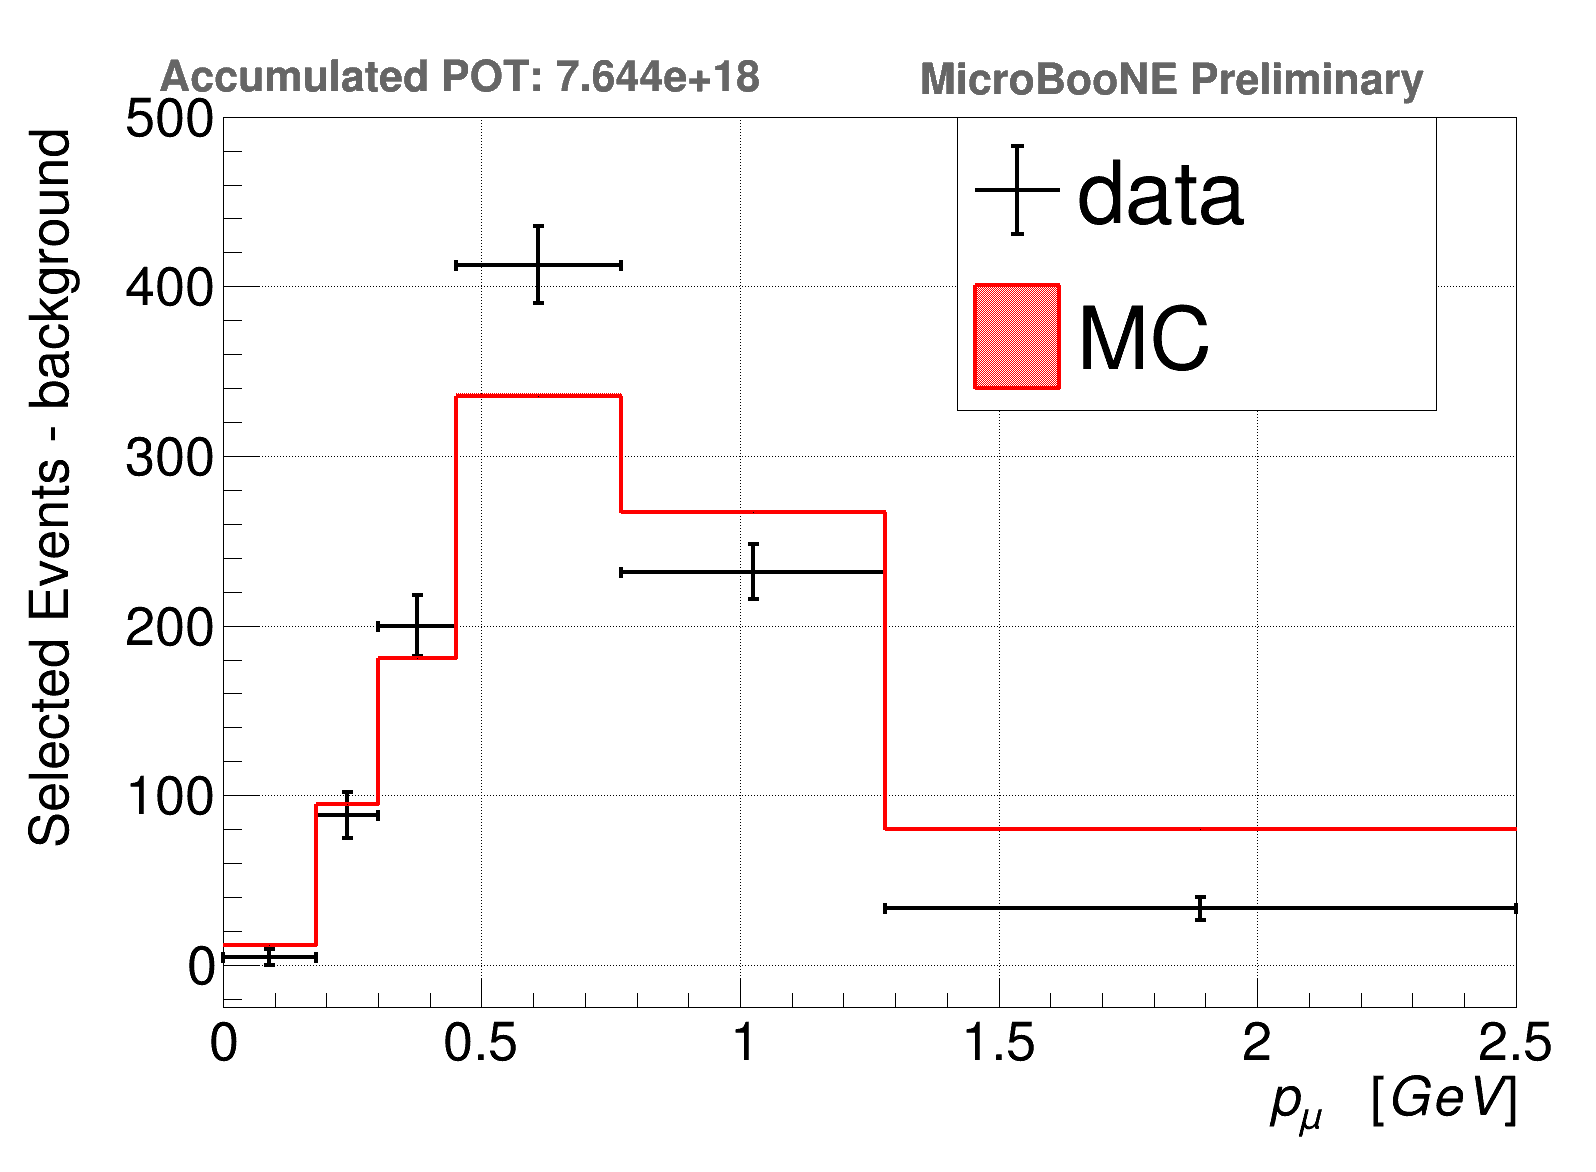

In [37]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(500)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted.pdf")

h_data.Write("h_data_bkgsubtracted")
h_overlay_sig.Write("h_MC_bkgsubtracted")

In [38]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

147.147607254
6129.97106989
8882.55268137
4029.94546361
891.420807398
22.3423452297


454

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_data_bkgsubtracted_binwidth.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_data_bkgsubtracted_binwidth.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_data_bkgsubtracted_binwidth.pdf has been created


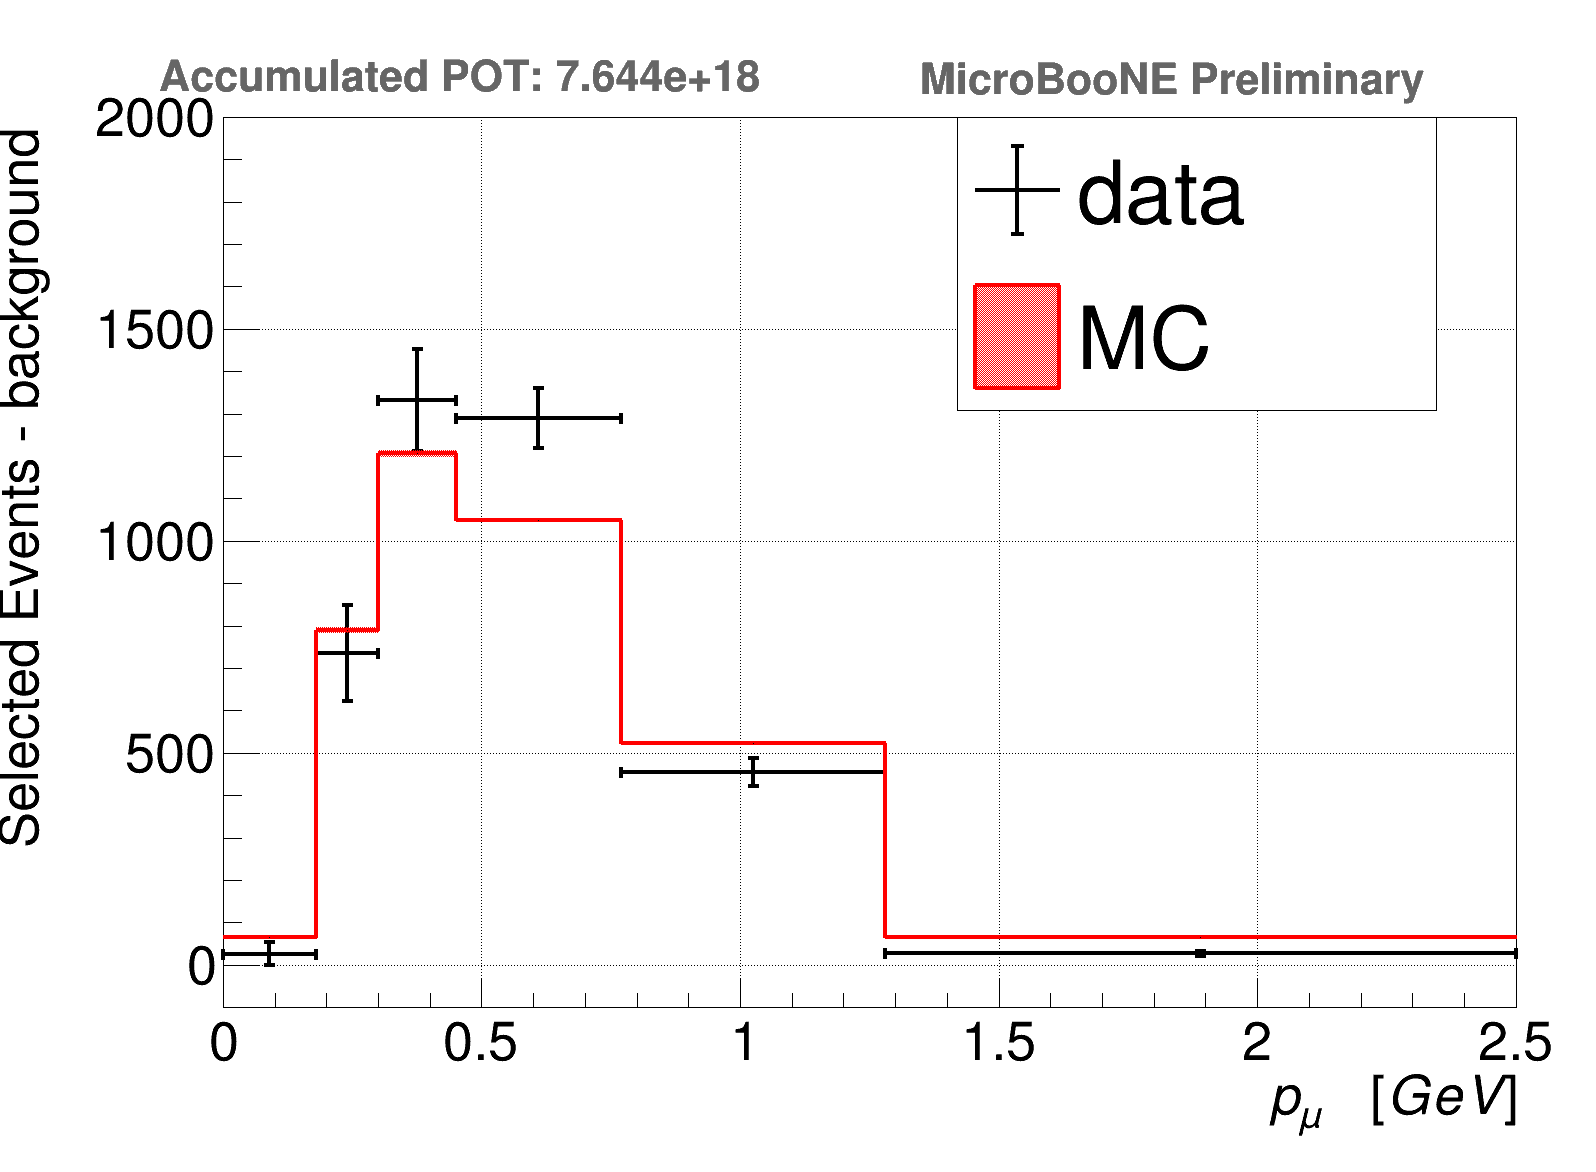

In [39]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(2000)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted_binwidth.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted_binwidth.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_bkgsubtracted_binwidth")

In [40]:
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)

26.4865703583 26.955725217
735.596557617 113.38940152
1332.38269043 120.037198473
1289.58251953 70.8402382939
454.624603271 32.1860410402
27.2576618195 5.52678703636


In [41]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

In [42]:
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)

0.0320236459374 0.0326041704955
0.781616926193 0.120804299091
1.18243849277 0.106993798999
0.967837691307 0.0534957997368
0.300568878651 0.0213794050275
0.0174584183842 0.00354614335965


In [43]:
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

In [44]:
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)

0.0320236459374 0.0326041704955
0.781616926193 0.120804299091
1.18243849277 0.106993798999
0.967837691307 0.0534957997368
0.300568878651 0.0213794050275
0.0174584183842 0.00354614335965


426

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_xsec_corr.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_xsec_corr.pdf has been created


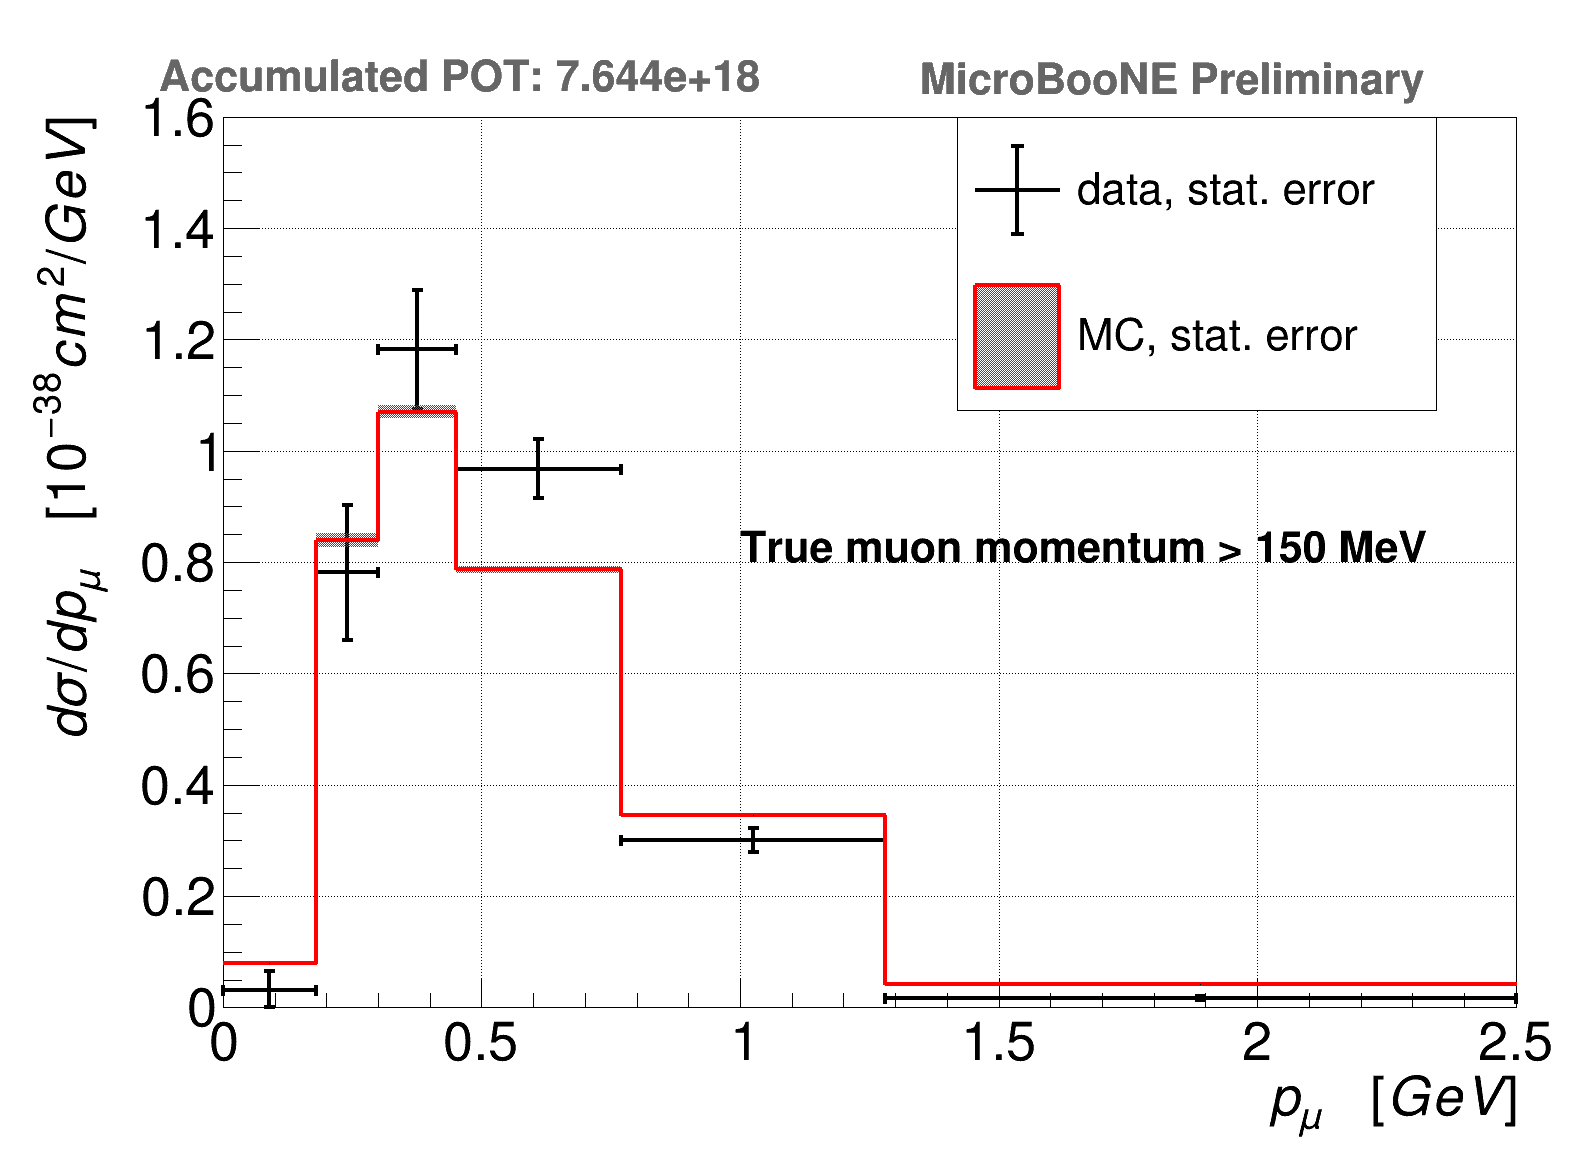

In [45]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data, stat. error',"lep");
legend.AddEntry(h_overlay_sig,'MC, stat. error',"f");
h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)
h_data.SetMinimum(0)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
#pt = ROOT.TPaveText(1.5,.6,2.4,1);
#pt.AddText("True muon momentum > 150 MeV");
#pt.AddText("They are added to the pave using the AddText method.");
#pt.Draw()
t = ROOT.TLatex(1,0.8,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [46]:
h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy'+'>>h_true',weight_name+'*(numu_true)','')
h_true.Scale(globale.scale[globale.overlay])
h_true.SetLineColor(ROOT.kOrange)
h_true.SetLineWidth(4)
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum+2))
for i in range(0,binnum+2):
    true_bins[i] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum+2))

true_bins_smeared = mitigation_matrix.dot(true_bins)
#sel_smeared = mitigation_matrix.dot(sel_smeared)


for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_smeare.Scale(1.0/(N_tot*beam_flux*1e-38))

for i in range(1,binnum+1):
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    h_true_smeare.SetBinContent(i,h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i))
    h_true_smeare.SetBinError(i,h_true_smeare.GetBinError(i)/h_true_smeare.GetBinWidth(i))
    print h_true_smeare.GetBinContent(i)
    #print h_true.GetBinContent(i)


0.2600798538916116
33.09267603846401
226.46589154842525
374.19207063256044
585.4081922660503
408.63340927192246
0.0794342830777
0.815398991108
1.07783436775
0.79041916132
0.346188277006
0.0419417619705


Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


426

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_xsec_corr_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_xsec_corr_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_xsec_corr_ratio.pdf has been created


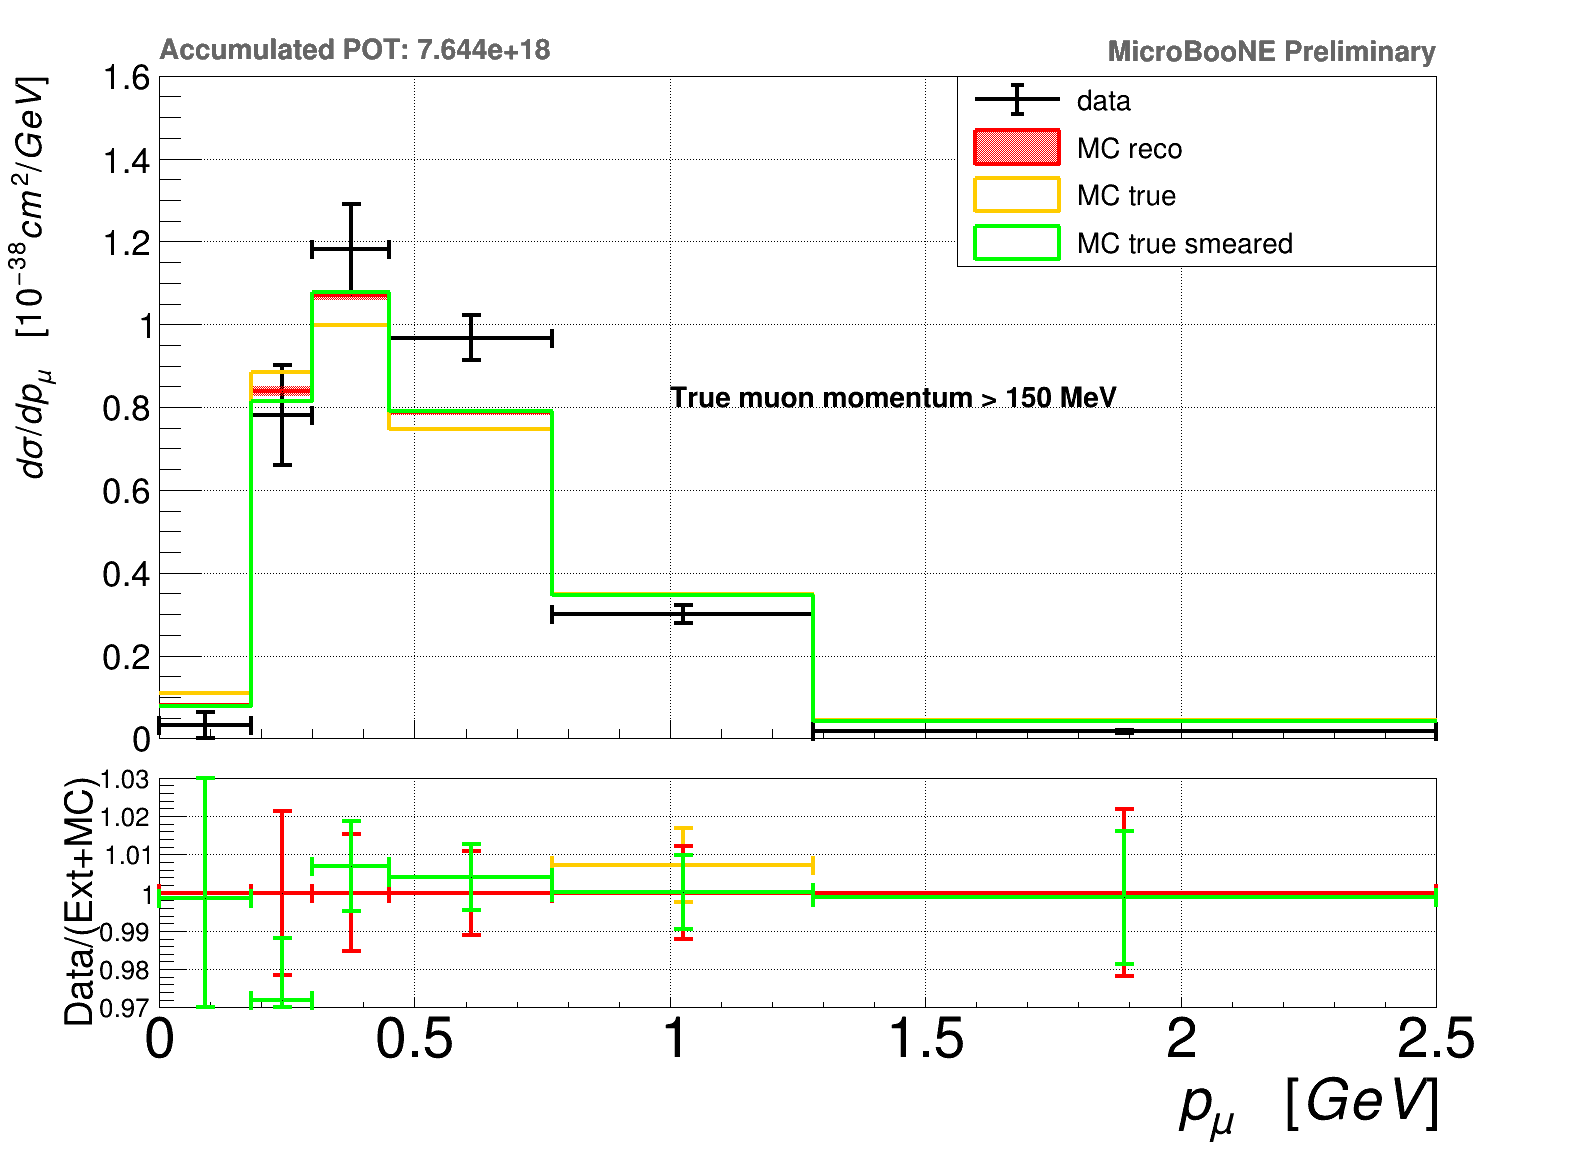

In [47]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
ROOT.gStyle.SetEndErrorSize(9)

#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
legend.AddEntry(h_true,'MC true',"f");
legend.AddEntry(h_true_smeare,'MC true smeared',"f");

h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
t = ROOT.TLatex(1,0.8,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_overlay_sig)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_overlay_sig)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_overlay_sig)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_overlay_sig)

h_overlay_data_ratio.SetMinimum(0.97)
h_overlay_data_ratio.SetMaximum(1.03)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_data_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_data_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_data_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_data_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_data_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_data_ratio.GetXaxis().SetTitleOffset(1)

h_overlay_true_ratio.SetLineWidth(4)
h_overlay_sig_ratio.SetLineWidth(4)
h_overlay_true_smeare_ratio.SetLineWidth(4)
h_overlay_data_ratio.SetLineWidth(4)

h_overlay_data_ratio.Draw('E1')
h_overlay_true_ratio.Draw('E1 same')
h_overlay_sig_ratio.Draw('same E1')
h_overlay_true_smeare_ratio.Draw('same E1')
h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_ratio.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [48]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [49]:
# close the root file with all the histos
RootFile.Close()

# Now in Cos(theta)

In [50]:
RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");

In [51]:
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))


853

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_eff_trueTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_eff_trueTheta.pdf has been created


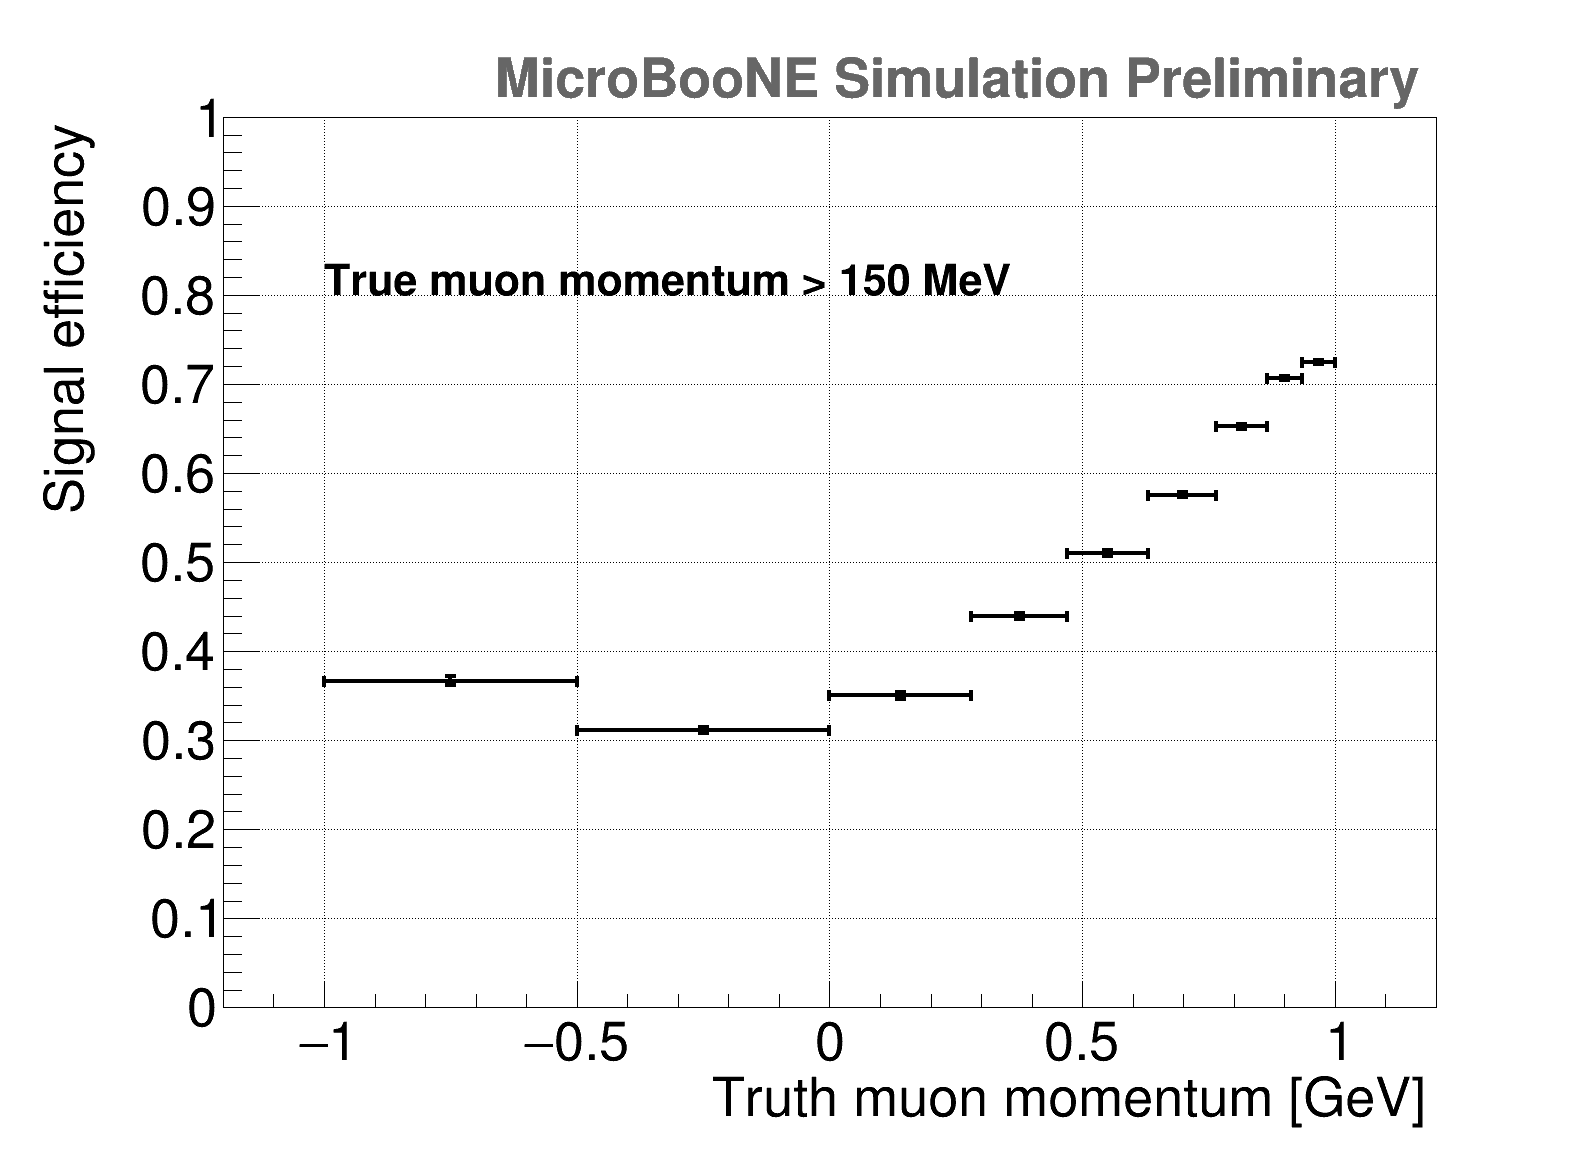

In [52]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
t = ROOT.TLatex(-1,0.8,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueTheta.pdf")

eff.Write("h_eff_true")

133974

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h2_true_costheta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h2_true_costheta.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h2_true_costheta.pdf has been created


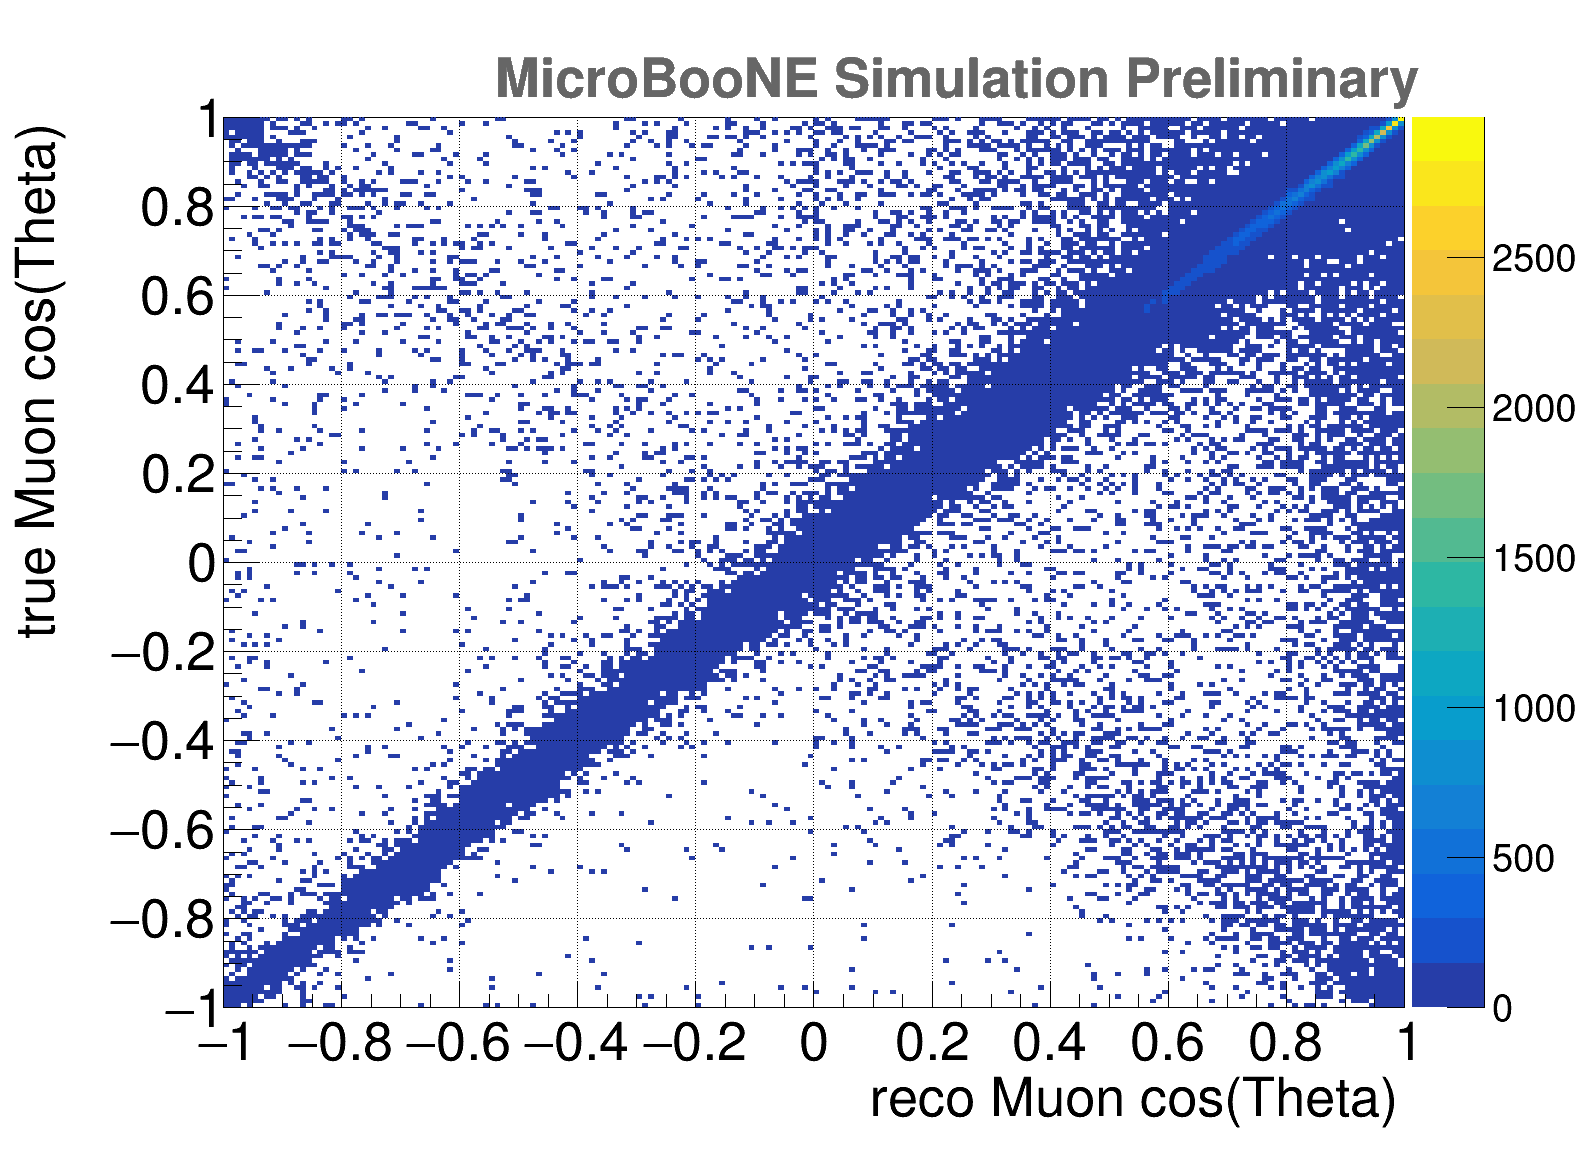

In [53]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon cos(Theta)")
h_migration.SetYTitle("true Muon cos(Theta)")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_costheta.root")
c1.SaveAs(globale.outputdir_png + "h2_true_costheta.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_costheta.pdf")

h_migration.Write("h2_true_theta_fine")

1646

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h2_true_Theta_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h2_true_Theta_bin.pdf has been created


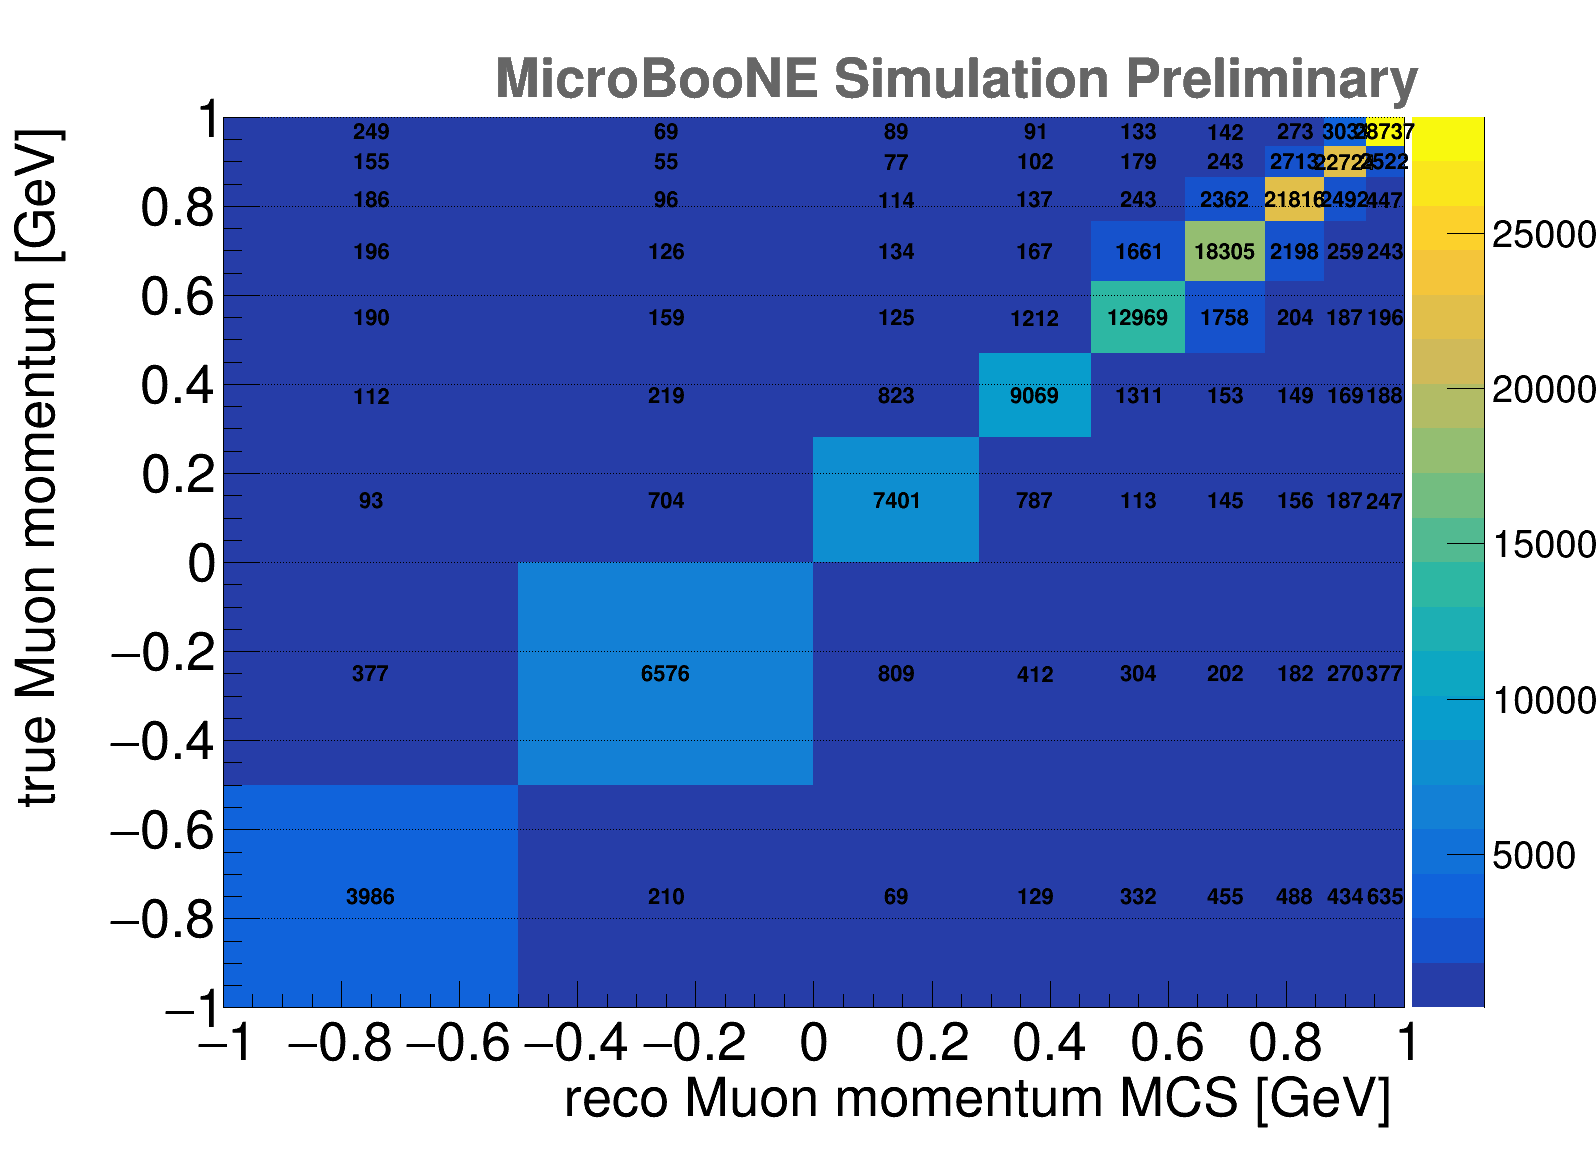

In [54]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat("2.0f");
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.SetGrid(0)
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_Theta_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_Theta_bin.pdf")

h_migration.Write("h2_true_theta_bin")

[[0.59156562 0.03963254 0.00950088 0.00917371 0.01119925 0.00842908
  0.00665715 0.00539414 0.00757314]
 [0.03118434 0.69156379 0.07160178 0.01792847 0.00936765 0.00542395
  0.00342684 0.00191706 0.00209991]
 [0.01018279 0.08510708 0.75272905 0.0674734  0.00733712 0.0057653
  0.00407312 0.00266593 0.002726  ]
 [0.01909644 0.04336727 0.07999788 0.7438566  0.0712761  0.00719184
  0.00490613 0.00354225 0.00278173]
 [0.04928646 0.03193566 0.01144858 0.10752187 0.76284626 0.07132757
  0.00872056 0.00621805 0.00404099]
 [0.0675478  0.02122089 0.01471176 0.01257217 0.10341969 0.7859432
  0.08468007 0.00845887 0.00432512]
 [0.07247219 0.01916931 0.01584108 0.01223568 0.01197658 0.09436953
  0.78215003 0.094296   0.00831421]
 [0.06436422 0.02837341 0.01903946 0.01382506 0.01101997 0.01113289
  0.08935467 0.78983769 0.09238161]
 [0.09430015 0.03963004 0.02512953 0.01541304 0.01155739 0.01041664
  0.01603143 0.08767    0.87575729]]


848

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_mitigation_matrix_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_mitigation_matrix_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_mitigation_matrix_theta.pdf has been created


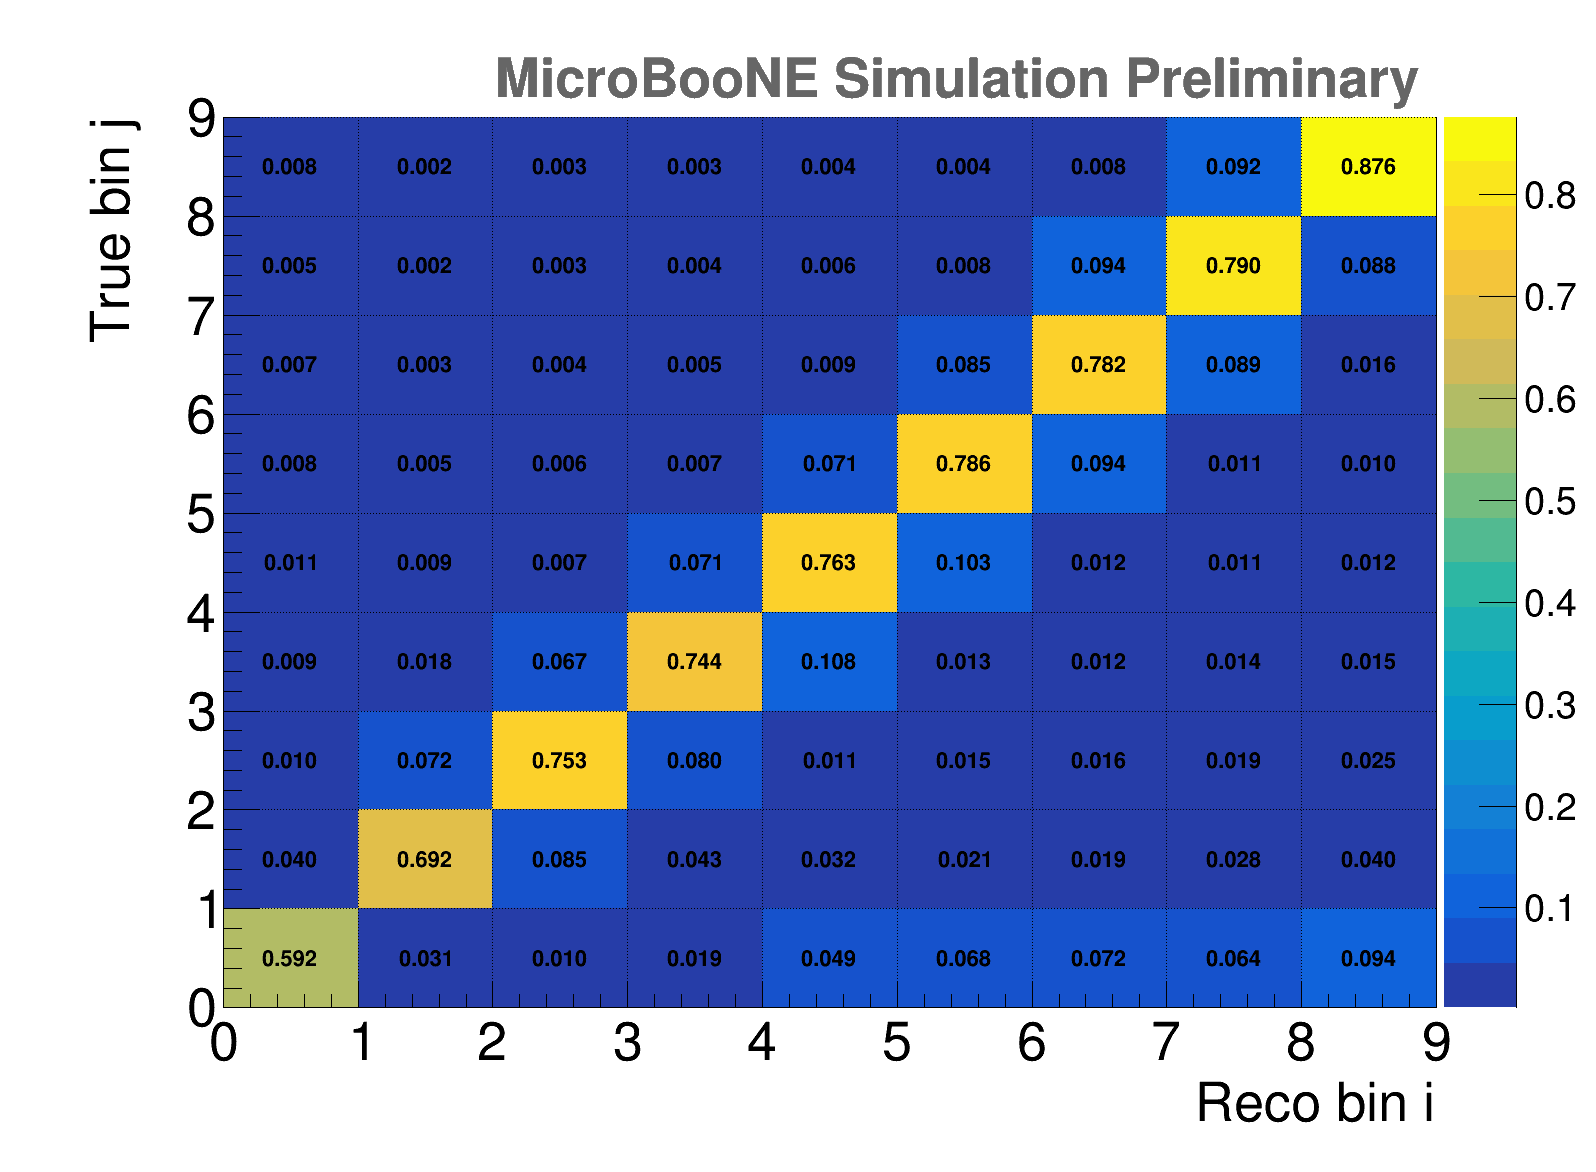

In [55]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ROOT.gStyle.SetPaintTextFormat("2.3f");
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)

h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.SetGrid(1)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix_theta.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix_theta.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix_theta")

In [56]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

532

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [57]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(outputdir+'eff_tilde_theta_xsec_CV',eff_tilde)

5130.208984375 13978.6630859375 0.3670028351664028
7779.5654296875 25014.5234375 0.3110019444953697
8665.0517578125 24738.47265625 0.35026623826848646
11147.4111328125 25374.03515625 0.43932354724694733
15942.234375 31252.798828125 0.5101058136480652
22201.046875 38580.140625 0.5754527203722446
26974.919921875 41355.80078125 0.652264480732893
28036.041015625 39679.5625 0.7065612433510324
32235.53125 44472.48046875 0.7248422150109508
[0.39790165 0.32944123 0.36271621 0.4384011  0.50452617 0.56709733
 0.63492216 0.68064985 0.69355839]


In [58]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

511

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_eff_tilde_xsecTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_eff_tilde_xsecTheta.pdf has been created


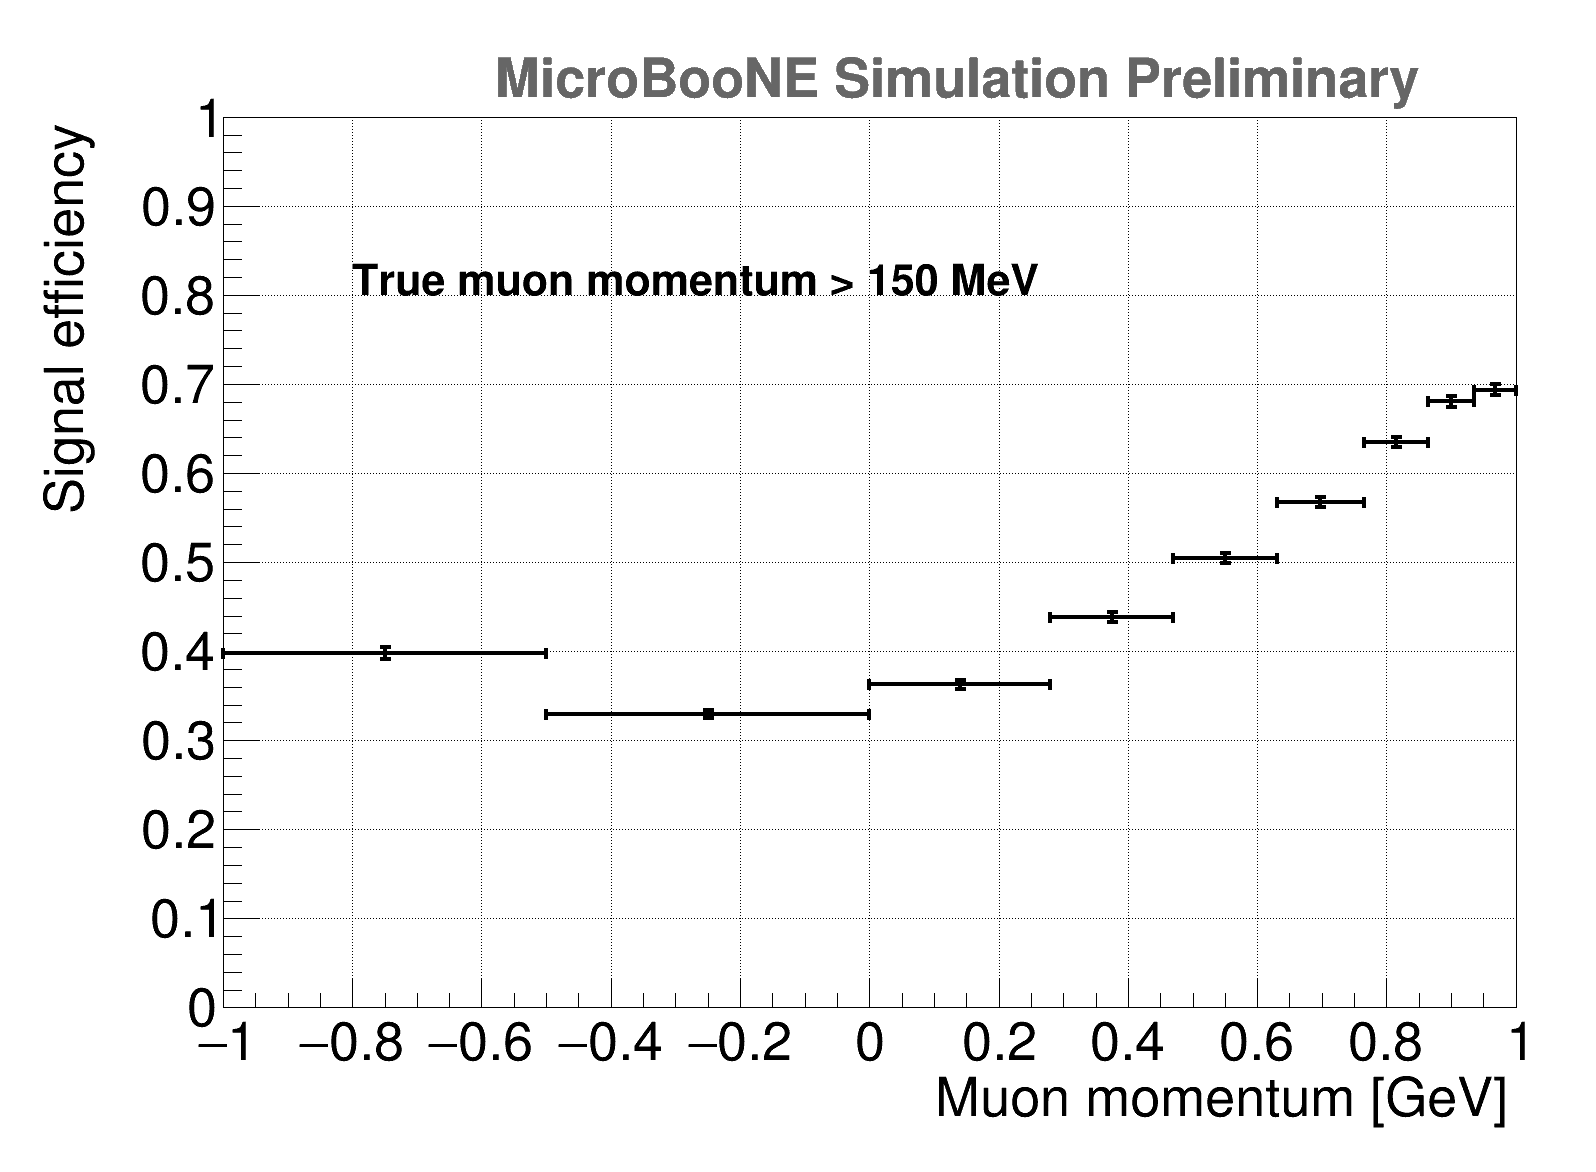

In [59]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
t = ROOT.TLatex(-0.8,0.8,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecTheta.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [60]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))

#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
globale.ext_out.Draw(variable+'>>h_ext',cut,'')
globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')


133759L

In [61]:
#lat = np.zeros(8,binnum)
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    n_da = h_data.GetBinContent(i)
    err_da = math.sqrt(n_da)
    n_ext = h_ext.GetBinContent(i)
    err_ext = math.sqrt(n_ext)
    n_dirt = h_dirt.GetBinContent(i)
    err_dirt = math.sqrt(n_dirt)
    n_ov = h_overlay.GetBinContent(i)
    err_ov = math.sqrt(n_ov)
    n_sig = h_signal.GetBinContent(i)
    err_sig = math.sqrt(n_sig)
    #print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
    #' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
    #print ''
    #print 'data: {0:0.2f}'.format(n_da*scale[data]), ' +- {0:0.2f}'.format(err_da*scale[data])
    #print ' Ext: {0:0.2f}'.format(n_ext*scale[ext]),' +- {0:0.2f}'.format(err_ext*scale[ext])
    print i,' & {0:0.2f}'.format(n_da),' $\pm$ {0:0.2f}'.format(err_da),' & {0:0.2f}'.format(n_ext*scale[ext]),' $\pm$ {0:0.2f}'.format(err_ext*scale[ext]),\
    ' & {0:0.2f}'.format(n_dirt*scale[dirt]),' $\pm$ {0:0.2f}'.format(err_dirt*scale[dirt]),' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
    ' & {0:0.2f}'.format((n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])),' $\pm$ {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])),\
    ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
    ' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])),' $\pm$ {0:0.2f}'.format(math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #print ' Overlay: {0:0.2f}'.format(n_ov*scale[overlay]),' +- {0:0.2f}'.format(err_ov*scale[overlay])
    #print ' Signal: {0:0.2f}'.format(n_sig*scale[overlay]),' +- {0:0.2f}'.format(err_sig*scale[overlay])
    #print 'Total back ground: {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #print 'Total data - background: {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' +- {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #lat[i-1][0]=i
    
    
n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
n_ext = h_ext.Integral(0,binnum+1)
err_ext = math.sqrt(n_ext)
n_dirt = h_dirt.Integral(0,binnum+1)
err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)
print 'For total cross section'

print 'tot & {0:0.2f}'.format(n_da),' $\pm$ {0:0.2f}'.format(err_da),' & {0:0.2f}'.format(n_ext*scale[ext]),' $\pm$ {0:0.2f}'.format(err_ext*scale[ext]),\
    ' & {0:0.2f}'.format(n_dirt*scale[dirt]),' $\pm$ {0:0.2f}'.format(err_dirt*scale[dirt]),' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
    ' & {0:0.2f}'.format((n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])),' $\pm$ {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])),\
    ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
    ' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])),' $\pm$ {0:0.2f}'.format(math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #
#print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
#' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov
#print ''
'''print 'data: ',n_da*scale[data], ' +- ',err_da*scale[data]
print ' Ext: ',n_ext*scale[ext],' +- ',err_ext*scale[ext],#\
print ' Dirt: ',n_dirt*scale[dirt],' +- ', err_dirt*scale[dirt]
print ' Overlay: ',n_ov*scale[overlay],' +- ',err_ov*scale[overlay]
print ' Signal: ',n_sig*scale[overlay],' +- ',err_sig*scale[overlay]

print 'Total back ground', n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay], ' +- ',math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])
print 'Total data - background',n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- ', math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])
'''



1  & 88.00  $\pm$ 9.38  & 5.81  $\pm$ 0.75  & 11.43  $\pm$ 0.84  & 28.93  $\pm$ 0.42  & 46.17  $\pm$ 1.20  & 29.48  $\pm$ 0.43  & 41.83  $\pm$ 9.46
2  & 86.00  $\pm$ 9.27  & 14.52  $\pm$ 1.19  & 1.63  $\pm$ 0.32  & 16.72  $\pm$ 0.32  & 32.87  $\pm$ 1.27  & 46.33  $\pm$ 0.53  & 53.13  $\pm$ 9.36
3  & 101.00  $\pm$ 10.05  & 21.87  $\pm$ 1.46  & 1.76  $\pm$ 0.33  & 16.97  $\pm$ 0.32  & 40.61  $\pm$ 1.53  & 54.45  $\pm$ 0.58  & 60.39  $\pm$ 10.17
4  & 111.00  $\pm$ 10.54  & 24.49  $\pm$ 1.54  & 2.07  $\pm$ 0.36  & 16.96  $\pm$ 0.32  & 43.52  $\pm$ 1.61  & 69.77  $\pm$ 0.66  & 67.48  $\pm$ 10.66
5  & 139.00  $\pm$ 11.79  & 24.00  $\pm$ 1.52  & 2.04  $\pm$ 0.35  & 20.32  $\pm$ 0.35  & 46.36  $\pm$ 1.60  & 99.82  $\pm$ 0.78  & 92.64  $\pm$ 11.90
6  & 193.00  $\pm$ 13.89  & 22.55  $\pm$ 1.48  & 2.47  $\pm$ 0.39  & 22.65  $\pm$ 0.37  & 47.68  $\pm$ 1.57  & 139.45  $\pm$ 0.93  & 145.32  $\pm$ 13.98
7  & 204.00  $\pm$ 14.28  & 15.97  $\pm$ 1.24  & 2.50  $\pm$ 0.39  & 23.74  $\pm$ 0.38  & 42.20  $

"print 'data: ',n_da*scale[data], ' +- ',err_da*scale[data]\nprint ' Ext: ',n_ext*scale[ext],' +- ',err_ext*scale[ext],#print ' Dirt: ',n_dirt*scale[dirt],' +- ', err_dirt*scale[dirt]\nprint ' Overlay: ',n_ov*scale[overlay],' +- ',err_ov*scale[overlay]\nprint ' Signal: ',n_sig*scale[overlay],' +- ',err_sig*scale[overlay]\n\nprint 'Total back ground', n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay], ' +- ',math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])\nprint 'Total data - background',n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- ', math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay])\n"

In [62]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
h_ext.Scale(globale.scale[globale.ext])
h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

476

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [63]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

200.263822556
973.427333832


In [64]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

493

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_data_theta_bkgsubtracted.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_data_theta_bkgsubtracted.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_data_theta_bkgsubtracted.pdf has been created


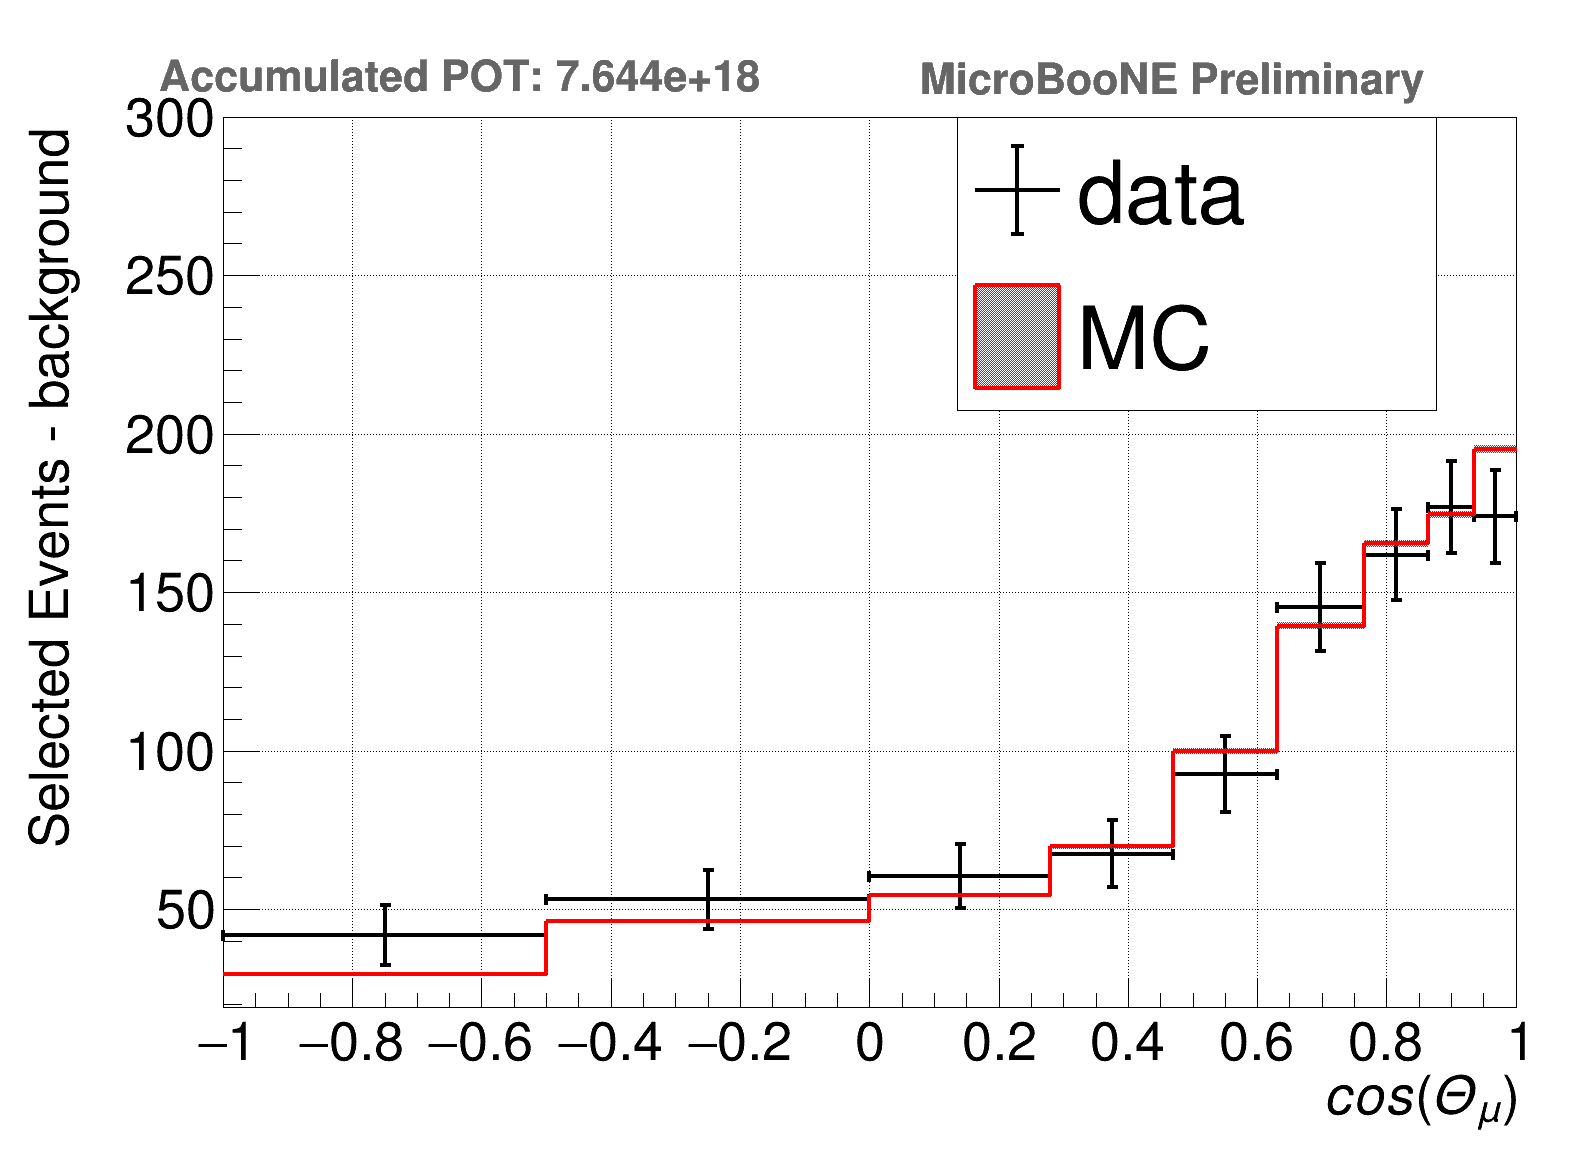

In [65]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
h_data.SetMaximum(300)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted.pdf")

h_data.Write("h_data_theta_bkgsubtracted")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted")

In [66]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

167.318634033
212.51133728
770.338818131
1869.28729345
3618.6692093
7973.81512492
16179.6616698
36112.2281598
41156.6346226


493

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_data_theta_bkgsubtracted_binwidth.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_data_theta_bkgsubtracted_binwidth.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_data_theta_bkgsubtracted_binwidth.pdf has been created


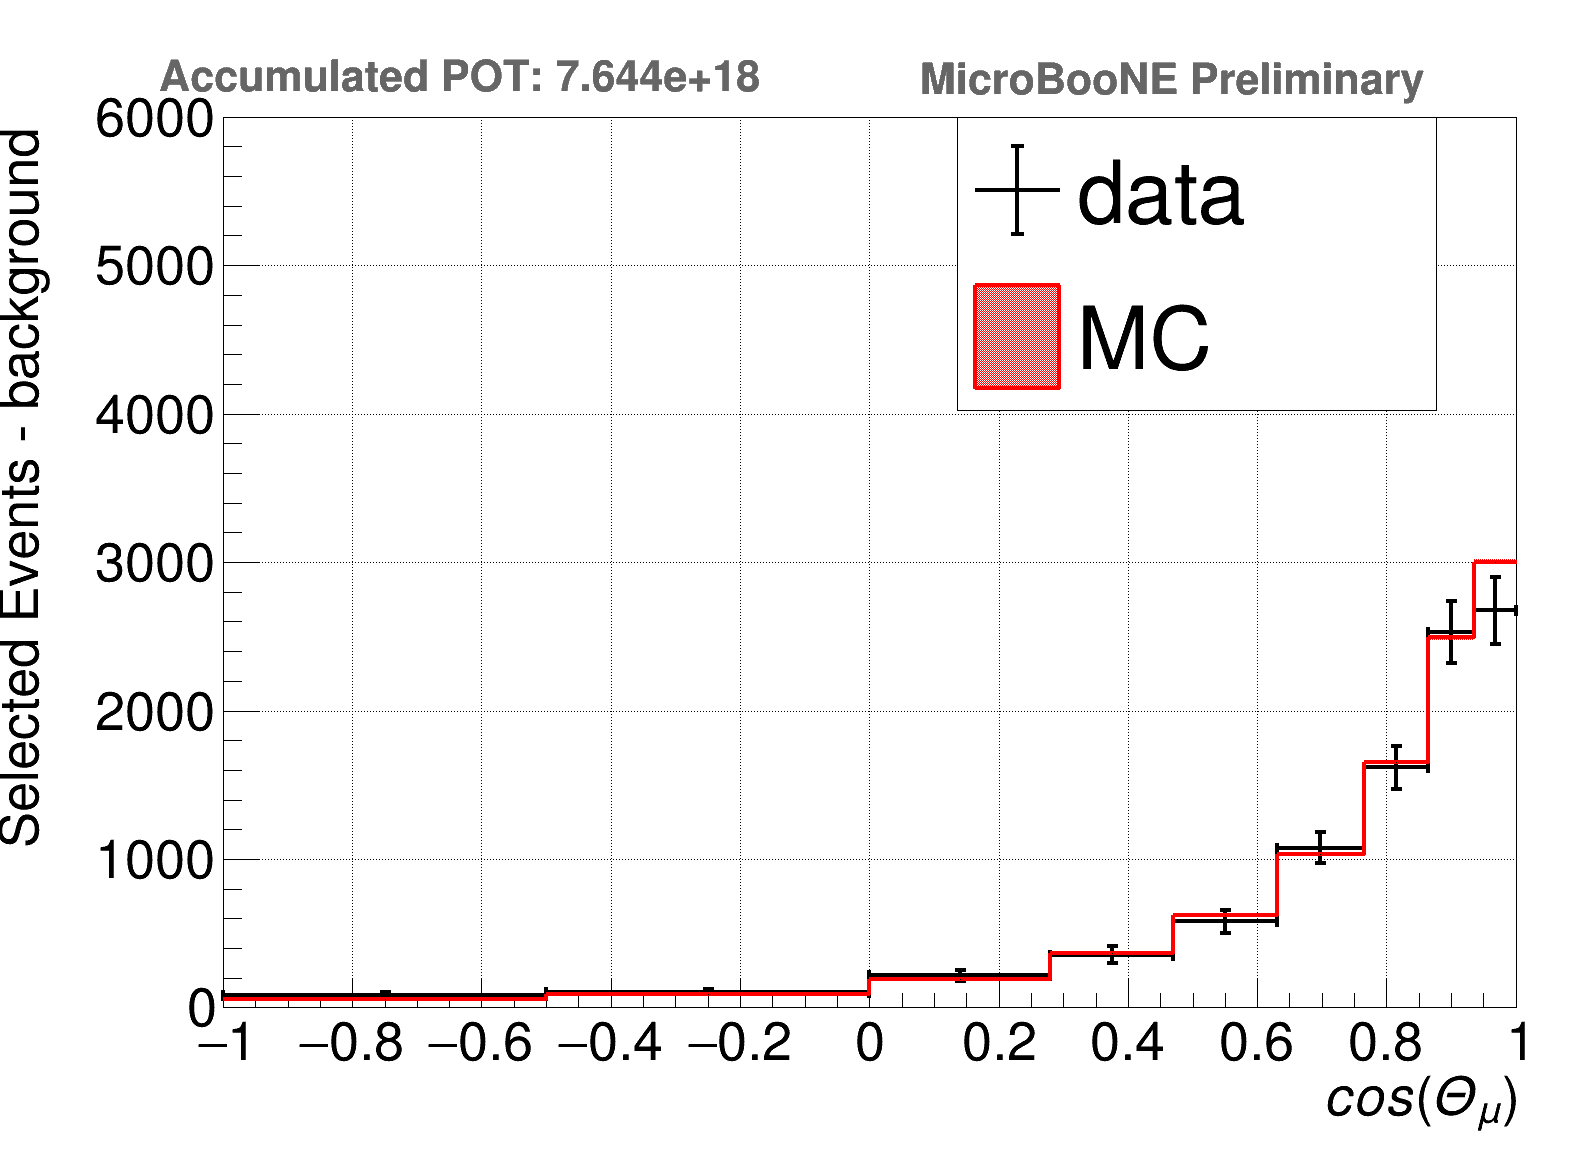

In [67]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
h_data.SetMaximum(6000)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted_binwidth.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted_binwidth.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_theta_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted_binwidth")

In [68]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

In [69]:
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

484

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/root/h_xsec_corr_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_phasespacerestriction/pdf/h_xsec_corr_theta.pdf has been created


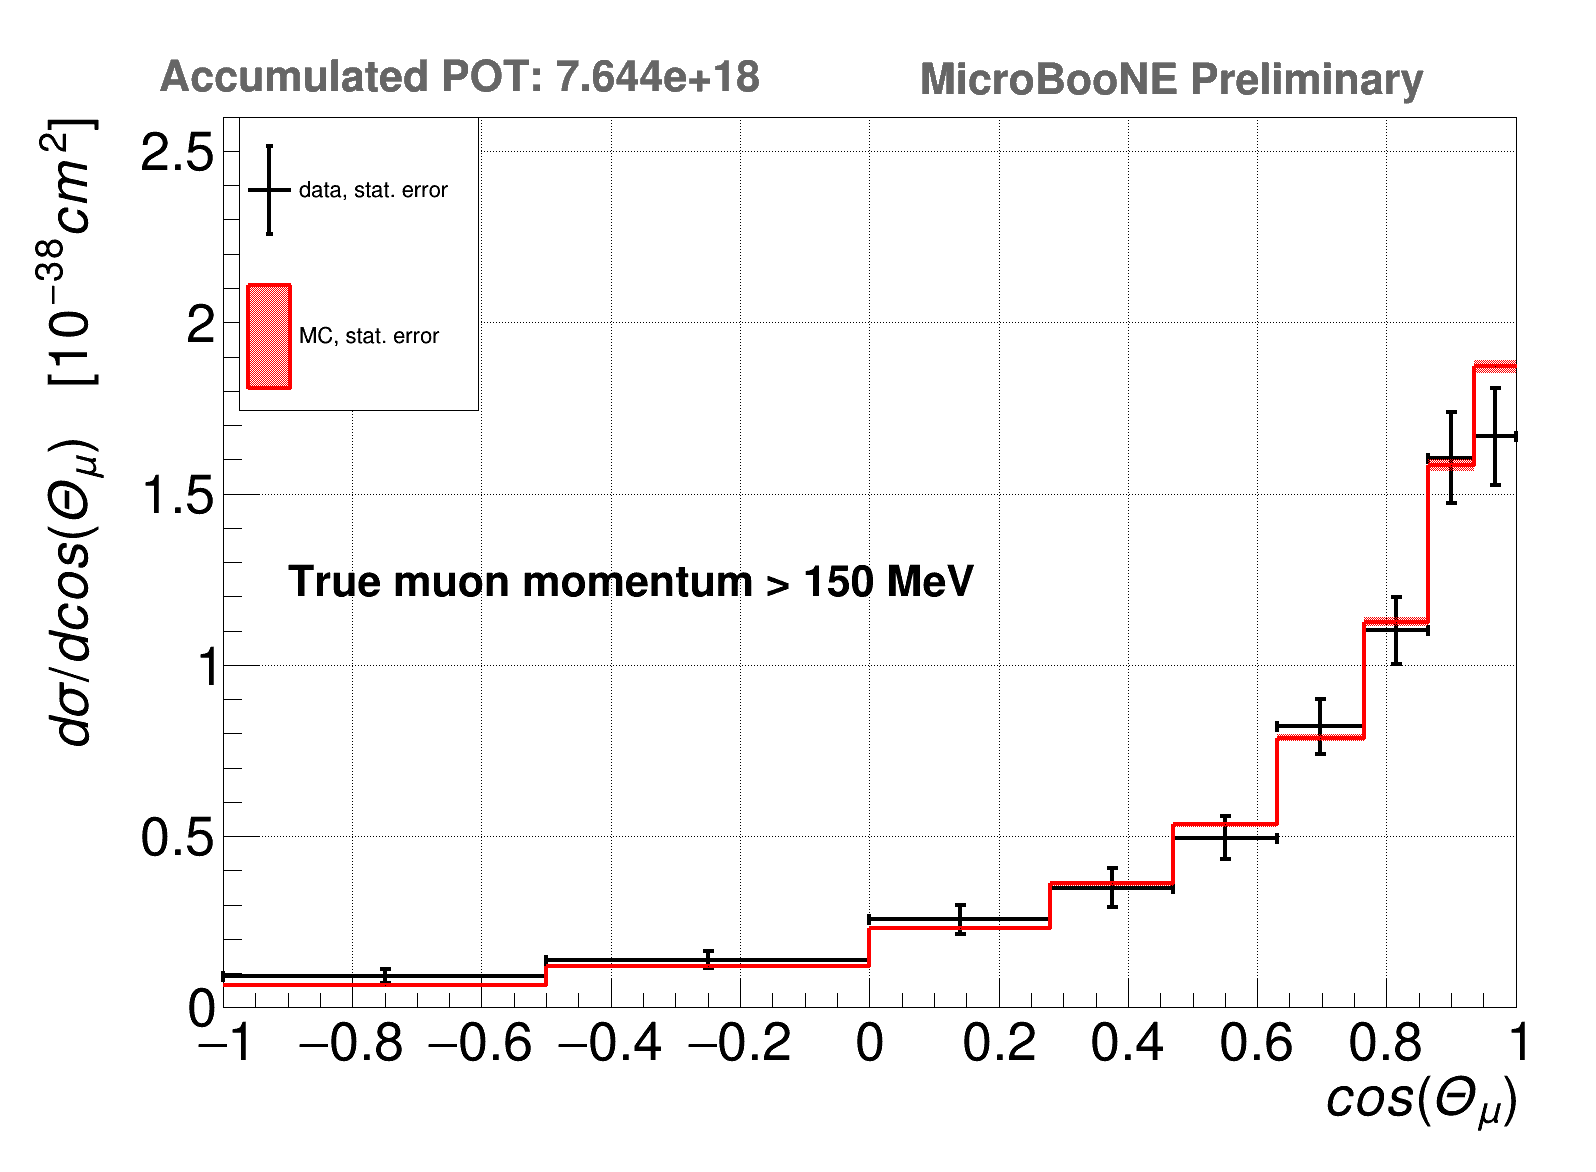

In [70]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data, stat. error',"lep");
legend.AddEntry(h_overlay_sig,'MC, stat. error',"f");
h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetMaximum(2.6)
h_data.SetMinimum(0)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
t = ROOT.TLatex(-0.9,1.2,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta.pdf")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

In [71]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [72]:
RootFile.Close()